# Unsupervised Approach for Clustering

# Housing Stability

In [ ]:
import pandas as pd
import numpy as np
import plotly as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('imputed_chosen280_variables.csv')

In [ ]:
df.drop(columns = ['Unnamed: 0'],inplace = True)

In [ ]:
# Extract numeric columns and normalize them
scaler = StandardScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df)
df

In [ ]:
df.columns = scaler.get_feature_names_out()

In [ ]:
str3 = """ACS_MEDIAN_HH_INC
ACS_MEDIAN_HOME_VALUE
ACS_MEDIAN_RENT
ACS_PCT_HH_FOOD_STMP_BLW_POV
ACS_PCT_RENTER_HU_COST_30PCT
ACS_PCT_OWNER_HU_COST_30PCT
ACS_PCT_HH_INC_10000
ACS_PCT_HH_INC_100000
ACS_AVG_HH_SIZE
ACS_PCT_10UNITS
ACS_PCT_HU_BUILT_1979"""

In [ ]:
list1 = ['ACS_MEDIAN_HH_INC_NHPI',
'ACS_MDN_GRNDPRNT_NO_PRNT_INC',
'ACS_MEDIAN_HH_INC_AIAN',
'ACS_MDN_GRNDPRNT_INC',
'ACS_PCT_POV_NHPI',
'ACS_PCT_NHPI_FEMALE',
'ACS_PCT_NHPI_MALE',
'ACS_MEDIAN_HH_INC_OTHER',
'ACS_MEDIAN_HH_INC_ASIAN',
'ACS_MEDIAN_HH_INC_MULTI',
'ACS_MEDIAN_HH_INC_BLACK',
'ACS_PCT_POV_AIAN'
]

In [ ]:
col2 = str3.split('\n')

In [ ]:
col2 = [x for x in col2 if x not in list1]

In [ ]:
hs_df = df[col2]

In [ ]:
hs_df.shape

In [ ]:
from sklearn.cluster import KMeans

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming inc1 is your dataframe containing the features
inc1=hs_df


# Step 2: Apply PCA
pca = PCA()
pca.fit(inc1)

# Step 3: Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Step 4: Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()


In [ ]:
pca = PCA(n_components=4)
pca_result = pca.fit_transform(inc1)

# Step 3: Plot elbow plot to determine the number of clusters
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(pca_result)
    wcss.append(kmeans.inertia_)

# Plot the elbow plot
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# Step 4: Apply K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(pca_result)

# Step 5: Assign cluster labels to each point in the DataFrame
inc1['Cluster'] = cluster_labels

# Print the DataFrame with cluster labels assigned
# print(inc1.head())

Silhouette Score: 0.2910598928986625

In [ ]:

# Step 1: Analyze Cluster Characteristics and Calculate Summary Statistics

# Calculate mean and standard deviation for each feature within each cluster
cluster_summary_stats = inc1.groupby('Cluster').agg(['mean', 'std'])

# Print the mean and standard deviation for each feature within each cluster
# print(cluster_summary_stats)
cl=pd.DataFrame(cluster_summary_stats)

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have your data points and cluster labels
# data_points = ...
# cluster_labels = ...

# Plotting the clusters
plt.figure(figsize=(8, 6))

# Define colors for each cluster
colors = ['r', 'g', 'b']

for cluster_id in range(len(set(cluster_labels))):
    # Filter data points for the current cluster
    cluster_data = pca_result[cluster_labels == cluster_id]

    # Plot data points for the current cluster
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], color=colors[cluster_id], label=f'Cluster {cluster_id}')

# Add labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Cluster Visualization')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [ ]:
nmn=cl.transpose()

In [ ]:
nmn

In [ ]:
pca_result = pd.DataFrame(pca_result)

In [ ]:
pca_result['Cluster']= cluster_labels

In [ ]:
cluster_centers = kmeans.cluster_centers_

In [ ]:
def inverse_distance_weighting(data_point_scaled, cluster_centers, risk_levels):
    # Calculate inverse distances
    distances = np.linalg.norm(cluster_centers - data_point_scaled, axis=1)
    inverse_distances = 1 / distances

    # Handle infinity values in case a point is exactly on a cluster center
    inverse_distances = np.nan_to_num(inverse_distances, nan=np.inf)

    # Weight risk levels by inverse distances and normalize
    weighted_risk_score = np.dot(inverse_distances, risk_levels) / np.sum(inverse_distances)

    return weighted_risk_score

In [ ]:
# Assuming X, cluster_centers, and risk_levels are defined
# X: Data points
# cluster_centers: Cluster centers obtained from KMeans
# risk_levels: Risk levels associated with each cluster
risk_levels = [0,0.5,1]
# Initialize an empty list to store risk scores for all data points
all_risk_scores = []

# Iterate over each data point in X
for data_point in X:
    # Calculate the risk score for the current data point
    risk_score = inverse_distance_weighting(data_point, cluster_centers, risk_levels)
    # Append the risk score to the list
    all_risk_scores.append(risk_score)

# Convert the list of risk scores to a NumPy array for easier manipulation
all_risk_scores = np.array(all_risk_scores)

# Print or further process the risk scores
# print("Risk scores for all data points:")
# print(all_risk_scores)

In [ ]:
hs_df['Score'] = all_risk_scores

In [ ]:
import matplotlib.pyplot as plt

# Assuming all_risk_scores is defined and contains the risk scores for all data points

# Plot histogram of risk scores
plt.hist(all_risk_scores, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Risk Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Risk Scores')
plt.grid(True)
plt.show()


**Cluster 0:**
- **ACS_MEDIAN_HH_INC:** Mean income is moderate.
- **ACS_MEDIAN_HOME_VALUE:** Mean home value is relatively low.
- **ACS_MEDIAN_RENT:** Mean rent is relatively gh.
-

- **ACS_PCT_HH_FOOD_STMP_BLW_POV:** Percentage of households receiving food stamps/SNAP with income below the poverty level is relatively high.
- **ACS_PCT_RENTER_HU_COST_30PCT:** Percentage of renter-occupied housing units with rent equal to 30 percent or more of household income is high.
- **ACS_PCT_OWNER_HU_COST_30PCT:** Percentage of owner-occupied housing units with selected monthly owner costs equal to 30 percent or more of household income is moderate.
- **ACS_PCT_HH_INC_10000:** Percentage of population with household income less than $10,000 is relatively high.
- **ACS_PCT_HU_BUILT_1979:** Percentage of housing units built before 1979 is moderate.

*Rationale:* Cluster 0 represents areas with moderate income levels but relatively low home values. However, rent is relatively high, indicating a potential housing affordability issue. A significant portion of households in this cluster are receiving food stamps/SNAP, indicating economic vulnerability. Additionally, a considerable percentage of renter-occupied housing units have high rental costs relative to income, suggesting housing instability. The percentage of older housing units built before 1979 could indicate potential issues with housing quality and maintenance, which may pose health risks.

**Cluster 1:**
- **ACS_MEDIAN_HH_INC:** Mean income is relatively low.
- **ACS_MEDIAN_HOME_VALUE:** Mean home value is low.
- **ACS_MEDIAN_RENT:** Mean rent is relatively low.
- **ACS_PCT_HH_FOOD_STMP_BLW_POV:** Percentage of households receiving food stamps/SNAP with income below the poverty level is moderate.
- **ACS_PCT_RENTER_HU_COST_30PCT:** Percentage of renter-occupied housing units with rent equal to 30 percent or more of household income is moderate.
- **ACS_PCT_OWNER_HU_COST_30PCT:** Percentage of owner-occupied housing units with selected monthly owner costs equal to 30 percent or more of household income is relatively low.
- **ACS_PCT_HH_INC_10000:** Percentage of population with household income less than $10,000 is moderate.
- **ACS_PCT_HU_BUILT_1979:** Percentage of housing units built before 1979 is high.

*Rationale:* Cluster 1 represents areas with relatively low income levels and home values, but also lower rent compared to other clusters. The percentage of households receiving food stamps/SNAP and those with high rental costs relative to income is moderate, indicating some economic vulnerability and housing instability. However, the high percentage of older housing units built before 1979 suggests potential issues with housing quality and maintenance, which may pose health risks.

**Cluster 2:**
- **ACS_MEDIAN_HH_INC:** Mean income is relatively high.
- **ACS_MEDIAN_HOME_VALUE:** Mean home value is moderate.
- **ACS_MEDIAN_RENT:** Mean rent is moderate.
- **ACS_PCT_HH_FOOD_STMP_BLW_POV:** Percentage of households receiving food stamps/SNAP with income below the poverty level is low.
- **ACS_PCT_RENTER_HU_COST_30PCT:** Percentage of renter-occupied housing units with rent equal to 30 percent or more of household income is low.
- **ACS_PCT_OWNER_HU_COST_30PCT:** Percentage of owner-occupied housing units with selected monthly owner costs equal to 30 percent or more of household income is low.
- **ACS_PCT_HH_INC_10000:** Percentage of population with household income less than $10,000 is low.
- **ACS_PCT_HU_BUILT_1979:** Percentage of housing units built before 1979 is low.

*Rationale:* Cluster 2 represents areas with relatively high income levels and moderate home values and rent. The percentage of households receiving food stamps/SNAP and those with high rental costs relative to income is low, indicating better economic stability and housing affordability. Additionally, the percentage of older housing units built before 1979 is low, suggesting better housing quality and potentially lower health risks associated with older housing.

**Cluster 3:**
- **ACS_MEDIAN_HH_INC:** Mean income is high.
- **ACS_MEDIAN_HOME_VALUE:** Mean home value is high.
- **ACS_MEDIAN_RENT:** Mean rent is relatively high.
- **ACS_PCT_HH_FOOD_STMP_BLW_POV:** Percentage of households receiving food stamps/SNAP with income below the poverty level is very low.
- **ACS_PCT_RENTER_HU_COST_30PCT:** Percentage of renter-occupied housing units with rent equal to 30 percent or more of household income is moderate.
- **ACS_PCT_OWNER_HU_COST_30PCT:** Percentage of owner-occupied housing units with selected monthly owner costs equal to 30 percent or more of household income is relatively high.
- **ACS_PCT_HH_INC_10000:** Percentage of population with household income less than $10,000 is very low.
- **ACS_PCT_HU_BUILT_1979:** Percentage of housing units built before 1979 is high.

*Rationale:* Cluster 3 represents areas with high income levels and high home values but relatively high rent. The percentage of households receiving food stamps/SNAP with income below the poverty level is very low, indicating strong economic stability. However, a moderate percentage of renter-occupied housing units have high rental costs relative to income, suggesting some housing affordability issues. Additionally, the relatively high percentage of older housing units built before 1979 may indicate potential issues with housing quality and maintenance, which could pose health risks.

# HealthCare Access

In [ ]:
import pandas as pd
import numpy as np
import plotly as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('imputed_chosen280_variables.csv')

In [ ]:
df.drop(columns = ['Unnamed: 0'],inplace = True)

In [ ]:
# Extract numeric columns and normalize them
scaler = StandardScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df)
df

0         1         2         3         4         5         6    \
0     -0.403541  1.277722 -1.154109 -1.114473 -0.240481  0.018059 -0.379630   
1     -0.403541 -1.060705 -1.264271 -0.778113  0.441184 -0.419313  1.661023   
2     -0.403541 -0.017110 -0.104572 -0.140095  0.056260 -0.353427 -0.015013   
3      0.444834 -0.361461 -0.197372 -0.531633 -0.845862  0.602622 -0.381130   
4     -0.403541 -0.656619  0.261838  0.574010 -0.214586  1.109384 -0.568690   
...         ...       ...       ...       ...       ...       ...       ...   
84409  1.682626  1.089734 -0.445836 -0.650058 -0.622606 -0.106704 -0.703734   
84410 -0.014123 -0.530123 -0.980483 -0.256611 -0.777975 -0.659026  0.397619   
84411 -0.403541 -0.054005 -0.772731 -0.239693 -0.381853  0.414777 -0.334616   
84412 -0.403541  0.198988 -0.354833 -0.873113 -0.773076 -1.094294 -1.042842   
84413 -0.403541 -0.774331 -0.121336 -0.810213 -0.803170 -0.333801 -0.654218   

            7         8         9    ...       270       271       272  \
0      0.541708 -0.942251 -0.033752  ...  0.615285 -0.141401  0.559106   
1     -1.556369  0.921541 -0.675091  ... -0.103794  0.892784  0.819151   
2      0.313192 -0.769992  0.118003  ... -0.477505 -0.141401 -0.178976   
3      1.073833 -0.734693  0.212565  ...  1.602110 -0.141401 -0.740262   
4      1.012982 -0.853298  0.708249  ...  0.830267 -0.141401 -0.318010   
...         ...       ...       ...  ...       ...       ...       ...   
84409  1.617611 -1.447734 -1.703064  ... -0.237667 -0.141401 -0.945380   
84410 -0.453924  0.447827 -0.334213  ... -0.100305 -0.141401 -0.893028   
84411  1.185178 -1.022733 -0.389882  ... -0.265139 -0.141401 -0.843250   
84412  0.323549 -1.094037 -0.881753  ... -0.494076 -0.073462 -1.007173   
84413  0.670531 -0.757990 -0.678904  ... -0.795400  2.289311 -0.217597   

            273       274       275       276       277       278       279  
0     -0.758684 -0.792701  0.908318 -0.630869 -1.176672  0.198383 -0.220984  
1     -0.784995  0.427974  0.912508 -0.312182 -1.217139  0.191374 -0.652763  
2     -0.258779 -0.817869  0.577745 -0.630869 -0.158984  0.172500  1.015423  
3     -0.523140 -0.739847  0.695075 -0.630869 -0.028588 -0.812220 -0.292381  
4     -0.098408 -0.926094  0.561449 -0.630869  0.227707  3.568909 -0.371710  
...         ...       ...       ...       ...       ...       ...       ...  
84409 -0.772466 -1.029285  0.853377  1.379311 -0.397294  0.335912  0.592710  
84410 -0.784995 -0.440341  0.465070 -0.459268 -1.021546  0.379723  2.223498  
84411 -0.332700 -1.165195  0.451568 -0.630869 -0.809465  0.379723  1.133284  
84412 -0.524392 -0.976431  0.792384  0.790965 -0.264650 -0.812220  0.993890  
84413 -0.665970 -0.160970  0.860361  0.668394 -0.097533 -0.812220  1.046021  

[84414 rows x 280 columns]

In [ ]:
df.columns = scaler.get_feature_names_out()

In [ ]:
str3 = """ACS_PCT_HEALTH_INC_138_199
ACS_PCT_HEALTH_INC_200_399
ACS_PCT_HEALTH_INC_ABOVE400
ACS_PCT_HEALTH_INC_BELOW137
ACS_PCT_MEDICAID_ANY
ACS_PCT_MEDICAID_ANY_BELOW64
ACS_PCT_MEDICARE_ONLY
ACS_PCT_OTHER_INS
ACS_PCT_PRIVATE_ANY
ACS_PCT_PRIVATE_ANY_BELOW64
ACS_PCT_PRIVATE_EMPL
ACS_PCT_PRIVATE_EMPL_BELOW64
ACS_PCT_PRIVATE_MDCR
ACS_PCT_PRIVATE_MDCR_35_64
ACS_PCT_PRIVATE_OTHER
ACS_PCT_PRIVATE_OTHER_BELOW64
ACS_PCT_PRIVATE_SELF
ACS_PCT_PRIVATE_SELF_BELOW64
ACS_PCT_PUBLIC_OTHER
ACS_PCT_PUBLIC_ONLY
ACS_PCT_PUBLIC_OTHER_BELOW64
ACS_PCT_PVT_EMPL_DRCT
ACS_PCT_PVT_EMPL_DRCT_BELOW64
ACS_PCT_SELF_MDCR_ABOVE35
ACS_PCT_TRICARE_VA
ACS_PCT_TRICARE_VA_BELOW64
ACS_PCT_UNINSURED
ACS_PCT_UNINSURED_BELOW64
POS_DIST_ALC_TRACT
POS_DIST_CLINIC_TRACT
POS_DIST_ED_TRACT
POS_DIST_MEDSURG_ICU_TRACT
POS_DIST_OBSTETRICS_TRACT
POS_DIST_PED_ICU_TRACT
POS_DIST_TRAUMA_TRACT"""

In [ ]:
list1 = ['ACS_MEDIAN_HH_INC_NHPI',
'ACS_MDN_GRNDPRNT_NO_PRNT_INC',
'ACS_MEDIAN_HH_INC_AIAN',
'ACS_MDN_GRNDPRNT_INC',
'ACS_PCT_POV_NHPI',
'ACS_PCT_NHPI_FEMALE',
'ACS_PCT_NHPI_MALE',
'ACS_MEDIAN_HH_INC_OTHER',
'ACS_MEDIAN_HH_INC_ASIAN',
'ACS_MEDIAN_HH_INC_MULTI',
'ACS_MEDIAN_HH_INC_BLACK',
'ACS_PCT_POV_AIAN'
]

In [ ]:
col2 = str3.split('\n')

In [ ]:
col2 = [x for x in col2 if x not in list1]

In [ ]:
hc_df = df[col2]

In [ ]:
hc_df.shape

(84414, 35)

In [ ]:
from sklearn.cluster import KMeans

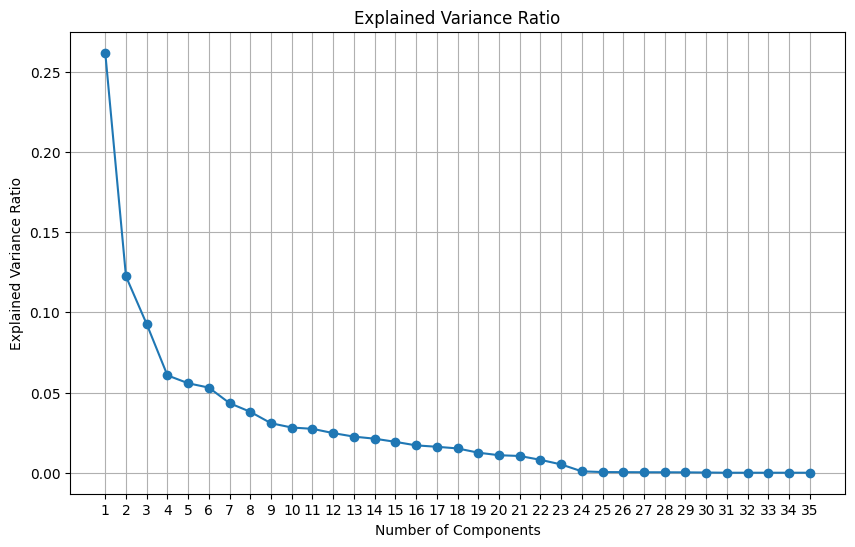

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming inc1 is your dataframe containing the features
inc1=hc_df


# Step 2: Apply PCA
pca = PCA()
pca.fit(inc1)

# Step 3: Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Step 4: Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()


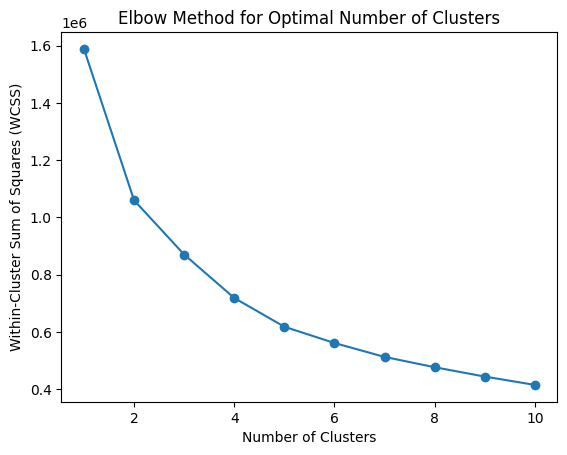

In [ ]:
pca = PCA(n_components=4)
pca_result = pca.fit_transform(inc1)

# Step 3: Plot elbow plot to determine the number of clusters
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(pca_result)
    wcss.append(kmeans.inertia_)

# Plot the elbow plot
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# Step 4: Apply K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(pca_result)

# Step 5: Assign cluster labels to each point in the DataFrame
inc1['Cluster'] = cluster_labels

# Print the DataFrame with cluster labels assigned
# print(inc1.head())

In [ ]:

from sklearn.metrics import silhouette_score

# Assuming cluster_labels contains the cluster labels assigned by K-means clustering
# Assuming pca_result contains the PCA-transformed data

# Calculate silhouette score
silhouette_avg = silhouette_score(pca_result, cluster_labels)

# Print the silhouette score
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.34414345962851983


In [ ]:
# Step 1: Analyze Cluster Characteristics and Calculate Summary Statistics

# Calculate mean and standard deviation for each feature within each cluster
cluster_summary_stats = inc1.groupby('Cluster').agg(['mean'])

# Print the mean and standard deviation for each feature within each cluster
# print(cluster_summary_stats)
cl=pd.DataFrame(cluster_summary_stats)

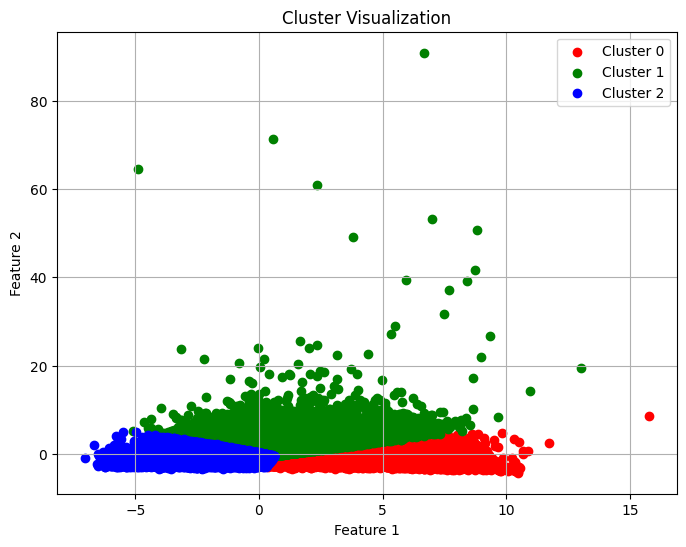

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have your data points and cluster labels
# data_points = ...
# cluster_labels = ...

# Plotting the clusters
plt.figure(figsize=(8, 6))

# Define colors for each cluster
colors = ['r', 'g', 'b']

for cluster_id in range(len(set(cluster_labels))):
    # Filter data points for the current cluster
    cluster_data = pca_result[cluster_labels == cluster_id]

    # Plot data points for the current cluster
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], color=colors[cluster_id], label=f'Cluster {cluster_id}')

# Add labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Cluster Visualization')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [ ]:
nmn=cl.transpose()

In [ ]:
nmn

Cluster                                    0         1         2
ACS_PCT_HEALTH_INC_138_199    mean  0.682656  0.251056 -0.522686
ACS_PCT_HEALTH_INC_200_399    mean  0.077312  0.466074 -0.262439
ACS_PCT_HEALTH_INC_ABOVE400   mean -0.952874 -0.309379  0.710516
ACS_PCT_HEALTH_INC_BELOW137   mean  0.986331 -0.008290 -0.582891
ACS_PCT_MEDICAID_ANY          mean  1.135556 -0.089159 -0.634105
ACS_PCT_MEDICAID_ANY_BELOW64  mean  1.095075  0.006108 -0.654266
ACS_PCT_MEDICARE_ONLY         mean -0.092809  0.450472 -0.153994
ACS_PCT_OTHER_INS             mean -0.175980  0.562768 -0.156668
ACS_PCT_PRIVATE_ANY           mean -1.109633 -0.262043  0.781784
ACS_PCT_PRIVATE_ANY_BELOW64   mean -1.124984 -0.238842  0.780142
ACS_PCT_PRIVATE_EMPL          mean -0.915340 -0.438430  0.748121
ACS_PCT_PRIVATE_EMPL_BELOW64  mean -1.043094 -0.287783  0.754156
ACS_PCT_PRIVATE_MDCR          mean -0.476789  0.253300  0.165994
ACS_PCT_PRIVATE_MDCR_35_64    mean -0.104243  0.237666 -0.048362
ACS_PCT_PRIVATE_OTHER         mean -0.175772  0.272745 -0.022103
ACS_PCT_PRIVATE_OTHER_BELOW64 mean -0.188968  0.290368 -0.022437
ACS_PCT_PRIVATE_SELF          mean -0.390717 -0.097826  0.277858
ACS_PCT_PRIVATE_SELF_BELOW64  mean -0.434901  0.017592  0.250541
ACS_PCT_PUBLIC_OTHER          mean  0.053666  0.446627 -0.239342
ACS_PCT_PUBLIC_ONLY           mean  1.043667  0.159691 -0.695010
ACS_PCT_PUBLIC_OTHER_BELOW64  mean  0.101054  0.155286 -0.132230
ACS_PCT_PVT_EMPL_DRCT         mean -0.254888 -0.150374  0.221461
ACS_PCT_PVT_EMPL_DRCT_BELOW64 mean -0.280733 -0.104076  0.215334
ACS_PCT_SELF_MDCR_ABOVE35     mean -0.488763  0.562022  0.029744
ACS_PCT_TRICARE_VA            mean -0.106458  0.329641 -0.089759
ACS_PCT_TRICARE_VA_BELOW64    mean -0.122658  0.361639 -0.094982
ACS_PCT_UNINSURED             mean  0.757171  0.050514 -0.473879
ACS_PCT_UNINSURED_BELOW64     mean  0.712751  0.154456 -0.495727
POS_DIST_ALC_TRACT            mean -0.236787  0.894571 -0.274588
POS_DIST_CLINIC_TRACT         mean -0.406802  0.453703  0.031292
POS_DIST_ED_TRACT             mean -0.377559  0.872947 -0.180804
POS_DIST_MEDSURG_ICU_TRACT    mean -0.331307  0.887974 -0.215297
POS_DIST_OBSTETRICS_TRACT     mean -0.373307  0.984589 -0.235181
POS_DIST_PED_ICU_TRACT        mean -0.246643  0.911359 -0.276521
POS_DIST_TRAUMA_TRACT         mean -0.272968  0.950320 -0.278955

In [ ]:
pca_result = pd.DataFrame(pca_result)

In [ ]:
pca_result['Cluster']= cluster_labels

In [ ]:
cluster_centers = kmeans.cluster_centers_

In [ ]:
def inverse_distance_weighting(data_point_scaled, cluster_centers, risk_levels):
    # Calculate inverse distances
    distances = np.linalg.norm(cluster_centers - data_point_scaled, axis=1)
    inverse_distances = 1 / distances

    # Handle infinity values in case a point is exactly on a cluster center
    inverse_distances = np.nan_to_num(inverse_distances, nan=np.inf)

    # Weight risk levels by inverse distances and normalize
    weighted_risk_score = np.dot(inverse_distances, risk_levels) / np.sum(inverse_distances)

    return weighted_risk_score

In [ ]:
# Assuming X, cluster_centers, and risk_levels are defined
# X: Data points
# cluster_centers: Cluster centers obtained from KMeans
# risk_levels: Risk levels associated with each cluster
risk_levels = [1,0.5,0.05]
# Initialize an empty list to store risk scores for all data points
all_risk_scores = []
X = pca_result.drop(columns=['Cluster']).values
# Iterate over each data point in X
for data_point in X:
    # Calculate the risk score for the current data point
    risk_score = inverse_distance_weighting(data_point, cluster_centers, risk_levels)
    # Append the risk score to the list
    all_risk_scores.append(risk_score)

# Convert the list of risk scores to a NumPy array for easier manipulation
all_risk_scores = np.array(all_risk_scores)

# Print or further process the risk scores
# print("Risk scores for all data points:")
# print(all_risk_scores)

In [ ]:
hc_df['Score'] = all_risk_scores

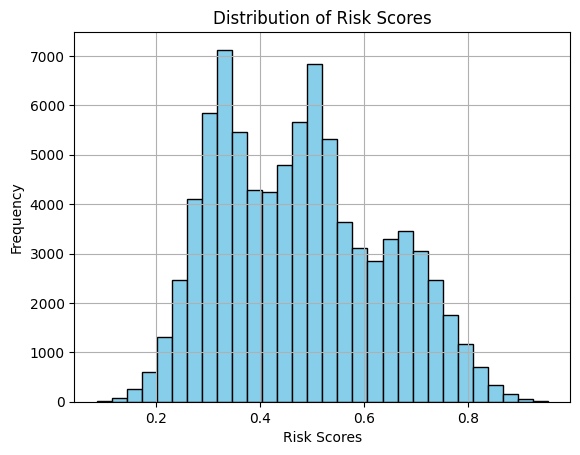

In [ ]:
import matplotlib.pyplot as plt

# Assuming all_risk_scores is defined and contains the risk scores for all data points

# Plot histogram of risk scores
plt.hist(all_risk_scores, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Risk Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Risk Scores')
plt.grid(True)
plt.show()


In [ ]:
df1 = pd.DataFrame(scaler.inverse_transform(df))
df1.columns = df.columns
scaler.fit(df1[col2])
df2 = pd.DataFrame(scaler.inverse_transform(nmn.transpose()))
df2.columns = df1[col2].columns
df2

ACS_PCT_HEALTH_INC_138_199  ACS_PCT_HEALTH_INC_200_399  \
0                   15.581685                   30.442949   
1                   12.630563                   34.461171   
2                    7.340011                   26.931296   

   ACS_PCT_HEALTH_INC_ABOVE400  ACS_PCT_HEALTH_INC_BELOW137  \
0                    19.291822                    34.683568   
1                    32.632273                    20.276059   
2                    53.775994                    11.952726   

   ACS_PCT_MEDICAID_ANY  ACS_PCT_MEDICAID_ANY_BELOW64  ACS_PCT_MEDICARE_ONLY  \
0             32.827704                     34.883144               5.347634   
1             16.457234                     19.323405               7.393578   
2              9.173083                      9.887614               5.117217   

   ACS_PCT_OTHER_INS  ACS_PCT_PRIVATE_ANY  ACS_PCT_PRIVATE_ANY_BELOW64  ...  \
0           5.220181            40.828374                    42.530774  ...   
1           7.840644            55.633072                    59.582081  ...   
2           5.288680            73.865422                    79.189536  ...   

   ACS_PCT_TRICARE_VA_BELOW64  ACS_PCT_UNINSURED  ACS_PCT_UNINSURED_BELOW64  \
0                    0.962452          14.363692                  16.220916   
1                    3.053393           9.169091                  11.584833   
2                    1.081941           5.314302                   6.185709   

   POS_DIST_ALC_TRACT  POS_DIST_CLINIC_TRACT  POS_DIST_ED_TRACT  \
0            6.684998               2.023467           2.292213   
1           24.179163               6.263080           8.913612   
2            6.100475               4.181908           3.334027   

   POS_DIST_MEDSURG_ICU_TRACT  POS_DIST_OBSTETRICS_TRACT  \
0                    2.664697                   2.932024   
1                   11.647623                  11.717380   
2                    3.519390                   3.825675   

   POS_DIST_PED_ICU_TRACT  POS_DIST_TRAUMA_TRACT  
0               13.622722               7.828133  
1               39.096519              24.412560  
2               12.965462               7.746964  

[3 rows x 35 columns]

Cluster 0: Underinsured and Limited Access
- **ACS_PCT_HEALTH_INC_138_199**, **ACS_PCT_HEALTH_INC_200_399**: Higher percentages of the population falling within these income brackets suggest a significant portion of the population with limited access to healthcare due to income constraints.
- **ACS_PCT_MEDICAID_ANY**, **ACS_PCT_MEDICAID_ANY_BELOW64**: Higher percentages of the population with Medicaid coverage, especially among those below 64 years old, indicate reliance on means-tested public health insurance, suggesting potential barriers to accessing comprehensive healthcare services.
- **ACS_PCT_UNINSURED**, **ACS_PCT_UNINSURED_BELOW64**: High percentages of the population without health insurance coverage, particularly among those below 64 years old, indicate a lack of access to essential healthcare services due to being uninsured.
- **POS_DIST_ALC_TRACT**, **POS_DIST_CLINIC_TRACT**, **POS_DIST_ED_TRACT**, **POS_DIST_MEDSURG_ICU_TRACT**, **POS_DIST_OBSTETRICS_TRACT**, **POS_DIST_PED_ICU_TRACT**, **POS_DIST_TRAUMA_TRACT**: Greater distances to healthcare facilities such as hospitals, clinics, emergency departments, and specialized care units indicate limited physical access to healthcare services, exacerbating the healthcare access challenges faced by this cluster.

Healthcare Access Risk: Individuals in Cluster 0 face significant healthcare access challenges due to being underinsured or uninsured, relying heavily on Medicaid, and residing in areas with limited proximity to healthcare facilities. These individuals may delay or forego necessary medical care due to financial barriers and limited physical access to healthcare services, leading to adverse health outcomes and increased healthcare disparities.

Cluster 1: Diverse Healthcare Coverage
- **ACS_PCT_HEALTH_INC_ABOVE400**: Higher percentages of the population falling above four times the poverty threshold indicate a relatively affluent segment of the population with greater access to healthcare resources.
- **ACS_PCT_PRIVATE_ANY**, **ACS_PCT_PRIVATE_ANY_BELOW64**: Higher percentages of the population with any private health insurance coverage, particularly among those below 64 years old, suggest access to comprehensive healthcare services through employer-based or direct-purchase private insurance plans.
- **ACS_PCT_MEDICARE_ONLY**, **ACS_PCT_TRICARE_VA**, **ACS_PCT_PUBLIC_ONLY**: Presence of various healthcare coverage types such as Medicare, TRICARE/military, VA, and other public-only health insurance combinations indicates a diverse mix of healthcare access options within this cluster.

Healthcare Access Risk: Individuals in Cluster 1 may have relatively diverse healthcare coverage options, including private insurance, Medicare, and other public health insurance programs. However, disparities in coverage types and potential gaps in access to certain healthcare services may still exist within this cluster, particularly for those relying solely on public insurance or facing limitations in private insurance coverage.

Cluster 2: Privately Insured and Well-Accessed
- **ACS_PCT_PRIVATE_EMPL**, **ACS_PCT_PRIVATE_EMPL_BELOW64**: Higher percentages of the population with employer-based health insurance, particularly among those below 64 years old, suggest comprehensive healthcare coverage through employer-sponsored plans.
- **ACS_PCT_PVT_EMPL_DRCT**, **ACS_PCT_PVT_EMPL_DRCT_BELOW64**: Presence of employer-based and direct-purchase coverage further indicates access to multiple healthcare coverage options within this cluster.
- **POS_DIST_CLINIC_TRACT**, **POS_DIST_ED_TRACT**, **POS_DIST_MEDSURG_ICU_TRACT**, **POS_DIST_OBSTETRICS_TRACT**, **POS_DIST_PED_ICU_TRACT**, **POS_DIST_TRAUMA_TRACT**: Relatively shorter distances to healthcare facilities indicate better physical access to a wide range of healthcare services.

Healthcare Access Risk: Individuals in Cluster 2 likely have comprehensive healthcare coverage through employer-based insurance plans, with relatively easy access to healthcare services due to the proximity of healthcare facilities. However, potential disparities in healthcare access may still exist for certain populations within this cluster, requiring attention to ensure equitable access to healthcare resources.parities within this cluster.

In [ ]:
hc_df.to_csv('hc_df.csv')

# Transportation

In [ ]:
import pandas as pd
import numpy as np
import plotly as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('imputed_chosen280_variables.csv')

In [ ]:
df.drop(columns = ['Unnamed: 0'],inplace = True)

In [ ]:
# Extract numeric columns and normalize them
scaler = StandardScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df)
df

0         1         2         3         4         5         6    \
0     -0.403541  1.277722 -1.154109 -1.114473 -0.240481  0.018059 -0.379630   
1     -0.403541 -1.060705 -1.264271 -0.778113  0.441184 -0.419313  1.661023   
2     -0.403541 -0.017110 -0.104572 -0.140095  0.056260 -0.353427 -0.015013   
3      0.444834 -0.361461 -0.197372 -0.531633 -0.845862  0.602622 -0.381130   
4     -0.403541 -0.656619  0.261838  0.574010 -0.214586  1.109384 -0.568690   
...         ...       ...       ...       ...       ...       ...       ...   
84409  1.682626  1.089734 -0.445836 -0.650058 -0.622606 -0.106704 -0.703734   
84410 -0.014123 -0.530123 -0.980483 -0.256611 -0.777975 -0.659026  0.397619   
84411 -0.403541 -0.054005 -0.772731 -0.239693 -0.381853  0.414777 -0.334616   
84412 -0.403541  0.198988 -0.354833 -0.873113 -0.773076 -1.094294 -1.042842   
84413 -0.403541 -0.774331 -0.121336 -0.810213 -0.803170 -0.333801 -0.654218   

            7         8         9    ...       270       271       272  \
0      0.541708 -0.942251 -0.033752  ...  0.615285 -0.141401  0.559106   
1     -1.556369  0.921541 -0.675091  ... -0.103794  0.892784  0.819151   
2      0.313192 -0.769992  0.118003  ... -0.477505 -0.141401 -0.178976   
3      1.073833 -0.734693  0.212565  ...  1.602110 -0.141401 -0.740262   
4      1.012982 -0.853298  0.708249  ...  0.830267 -0.141401 -0.318010   
...         ...       ...       ...  ...       ...       ...       ...   
84409  1.617611 -1.447734 -1.703064  ... -0.237667 -0.141401 -0.945380   
84410 -0.453924  0.447827 -0.334213  ... -0.100305 -0.141401 -0.893028   
84411  1.185178 -1.022733 -0.389882  ... -0.265139 -0.141401 -0.843250   
84412  0.323549 -1.094037 -0.881753  ... -0.494076 -0.073462 -1.007173   
84413  0.670531 -0.757990 -0.678904  ... -0.795400  2.289311 -0.217597   

            273       274       275       276       277       278       279  
0     -0.758684 -0.792701  0.908318 -0.630869 -1.176672  0.198383 -0.220984  
1     -0.784995  0.427974  0.912508 -0.312182 -1.217139  0.191374 -0.652763  
2     -0.258779 -0.817869  0.577745 -0.630869 -0.158984  0.172500  1.015423  
3     -0.523140 -0.739847  0.695075 -0.630869 -0.028588 -0.812220 -0.292381  
4     -0.098408 -0.926094  0.561449 -0.630869  0.227707  3.568909 -0.371710  
...         ...       ...       ...       ...       ...       ...       ...  
84409 -0.772466 -1.029285  0.853377  1.379311 -0.397294  0.335912  0.592710  
84410 -0.784995 -0.440341  0.465070 -0.459268 -1.021546  0.379723  2.223498  
84411 -0.332700 -1.165195  0.451568 -0.630869 -0.809465  0.379723  1.133284  
84412 -0.524392 -0.976431  0.792384  0.790965 -0.264650 -0.812220  0.993890  
84413 -0.665970 -0.160970  0.860361  0.668394 -0.097533 -0.812220  1.046021  

[84414 rows x 280 columns]

In [ ]:
df.columns = scaler.get_feature_names_out()

In [ ]:
str3="""ACS_PCT_COMMT_15MIN
ACS_PCT_COMMT_29MIN
ACS_PCT_COMMT_59MIN
ACS_PCT_COMMT_60MINUP
ACS_PCT_HU_NO_VEH
ACS_PCT_PUBL_TRANSIT
ACS_PCT_PUB_COMMT_15MIN
ACS_PCT_PUB_COMMT_29MIN
ACS_PCT_PUB_COMMT_59MIN
ACS_PCT_PUB_COMMT_60MINUP
ACS_PCT_TAXICAB_2WORK
ACS_PCT_WALK_2WORK
ACS_PCT_WORK_NO_CAR
ACS_PCT_DRIVE_2WORK"""

In [ ]:
list1 = ['ACS_MEDIAN_HH_INC_NHPI',
'ACS_MDN_GRNDPRNT_NO_PRNT_INC',
'ACS_MEDIAN_HH_INC_AIAN',
'ACS_MDN_GRNDPRNT_INC',
'ACS_PCT_POV_NHPI',
'ACS_PCT_NHPI_FEMALE',
'ACS_PCT_NHPI_MALE',
'ACS_MEDIAN_HH_INC_OTHER',
'ACS_MEDIAN_HH_INC_ASIAN',
'ACS_MEDIAN_HH_INC_MULTI',
'ACS_MEDIAN_HH_INC_BLACK',
'ACS_PCT_POV_AIAN'
]

In [ ]:
col2 = str3.split('\n')

In [ ]:
col2 = [x for x in col2 if x not in list1]

In [ ]:
trans_df=df[col2]

In [ ]:
trans_df.shape

(84414, 14)

In [ ]:
from sklearn.cluster import KMeans

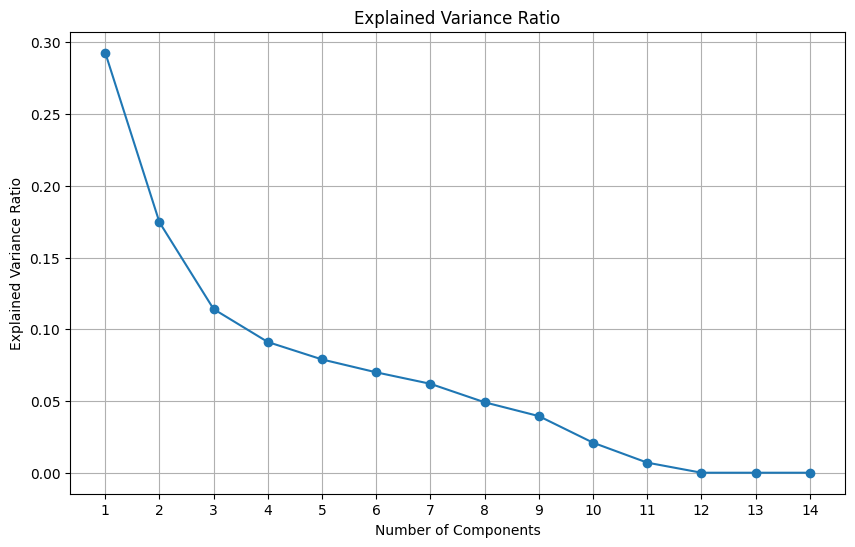

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming inc1 is your dataframe containing the features
inc1=trans_df


# Step 2: Apply PCA
pca = PCA()
pca.fit(inc1)

# Step 3: Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Step 4: Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()


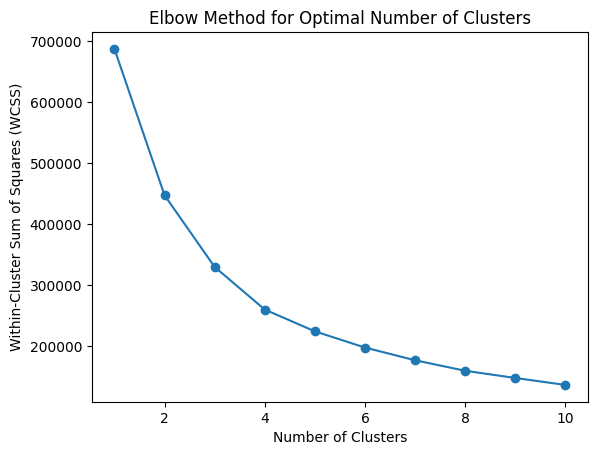

In [ ]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(inc1)

# Step 3: Plot elbow plot to determine the number of clusters
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(pca_result)
    wcss.append(kmeans.inertia_)

# Plot the elbow plot
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# Step 4: Apply K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(pca_result)

# Step 5: Assign cluster labels to each point in the DataFrame
inc1['Cluster'] = cluster_labels

# Print the DataFrame with cluster labels assigned
# print(inc1.head())

In [ ]:
from sklearn.metrics import silhouette_score

# Assuming cluster_labels contains the cluster labels assigned by K-means clustering
# Assuming pca_result contains the PCA-transformed data

# Calculate silhouette score
silhouette_avg = silhouette_score(pca_result, cluster_labels)

# Print the silhouette score
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.30260802050668717


Silhouette Score: 0.2895983038645871


In [ ]:
# Step 1: Analyze Cluster Characteristics and Calculate Summary Statistics

# Calculate mean and standard deviation for each feature within each cluster
cluster_summary_stats = inc1.groupby('Cluster').agg(['mean'])

# Print the mean and standard deviation for each feature within each cluster
# print(cluster_summary_stats)
cl=pd.DataFrame(cluster_summary_stats)

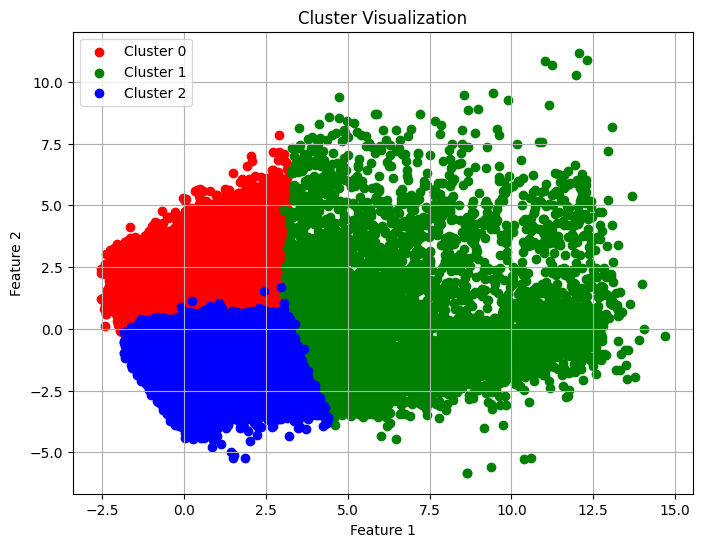

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have your data points and cluster labels
# data_points = ...
# cluster_labels = ...

# Plotting the clusters
plt.figure(figsize=(8, 6))

# Define colors for each cluster
colors = ['r', 'g', 'b']

for cluster_id in range(len(set(cluster_labels))):
    # Filter data points for the current cluster
    cluster_data = pca_result[cluster_labels == cluster_id]

    # Plot data points for the current cluster
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], color=colors[cluster_id], label=f'Cluster {cluster_id}')

# Add labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Cluster Visualization')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [ ]:
nmn=cl.transpose()

In [ ]:
nmn

Cluster                                0         1         2
ACS_PCT_COMMT_15MIN       mean  0.408907 -0.645928 -0.498932
ACS_PCT_COMMT_29MIN       mean  0.305173 -0.756799 -0.331813
ACS_PCT_COMMT_59MIN       mean -0.459549  0.752095  0.556861
ACS_PCT_COMMT_60MINUP     mean -0.493229  1.155774  0.546230
ACS_PCT_HU_NO_VEH         mean -0.132012  2.949613 -0.243466
ACS_PCT_PUBL_TRANSIT      mean -0.285205  3.186456 -0.055785
ACS_PCT_PUB_COMMT_15MIN   mean  0.231955 -0.338887 -0.287083
ACS_PCT_PUB_COMMT_29MIN   mean  0.302614 -0.066086 -0.430032
ACS_PCT_PUB_COMMT_59MIN   mean  0.188423  0.474910 -0.343923
ACS_PCT_PUB_COMMT_60MINUP mean -0.535514 -0.178359  0.804580
ACS_PCT_TAXICAB_2WORK     mean -0.011102  1.058465 -0.140079
ACS_PCT_WALK_2WORK        mean -0.017450  1.781085 -0.237501
ACS_PCT_WORK_NO_CAR       mean -0.168077  3.123702 -0.216745
ACS_PCT_DRIVE_2WORK       mean  0.222264 -3.320278  0.167007

In [ ]:
pca_result = pd.DataFrame(pca_result)

In [ ]:
pca_result['Cluster']= cluster_labels

In [ ]:
cluster_centers = kmeans.cluster_centers_

In [ ]:
def inverse_distance_weighting(data_point_scaled, cluster_centers, risk_levels):
    # Calculate inverse distances
    distances = np.linalg.norm(cluster_centers - data_point_scaled, axis=1)
    inverse_distances = 1 / distances

    # Handle infinity values in case a point is exactly on a cluster center
    inverse_distances = np.nan_to_num(inverse_distances, nan=np.inf)

    # Weight risk levels by inverse distances and normalize
    weighted_risk_score = np.dot(inverse_distances, risk_levels) / np.sum(inverse_distances)

    return weighted_risk_score

In [ ]:
# Assuming X, cluster_centers, and risk_levels are defined
# X: Data points
# cluster_centers: Cluster centers obtained from KMeans
# risk_levels: Risk levels associated with each cluster
risk_levels = [0.05,1,0.5]
# Initialize an empty list to store risk scores for all data points
all_risk_scores = []
X = pca_result.drop(columns=['Cluster']).values
# Iterate over each data point in X
for data_point in X:
    # Calculate the risk score for the current data point
    risk_score = inverse_distance_weighting(data_point, cluster_centers, risk_levels)
    # Append the risk score to the list
    all_risk_scores.append(risk_score)

# Convert the list of risk scores to a NumPy array for easier manipulation
all_risk_scores = np.array(all_risk_scores)

# Print or further process the risk scores
# print("Risk scores for all data points:")
# print(all_risk_scores)

In [ ]:
trans_df['Score'] = all_risk_scores

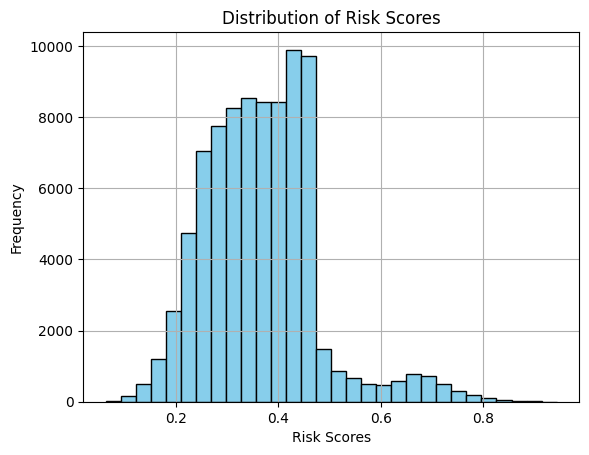

In [ ]:
import matplotlib.pyplot as plt

# Assuming all_risk_scores is defined and contains the risk scores for all data points

# Plot histogram of risk scores
plt.hist(all_risk_scores, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Risk Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Risk Scores')
plt.grid(True)
plt.show()

In [ ]:
df1 = pd.DataFrame(scaler.inverse_transform(df))
df1.columns = df.columns
scaler.fit(df1[col2])
df2 = pd.DataFrame(scaler.inverse_transform(nmn.transpose()))
df2.columns = df1[col2].columns
df2

ACS_PCT_COMMT_15MIN  ACS_PCT_COMMT_29MIN  ACS_PCT_COMMT_59MIN  \
0            32.973633            39.507940            22.336584   
1            16.573777            26.138067            38.490590   
2            18.859174            31.488495            35.887663   

   ACS_PCT_COMMT_60MINUP  ACS_PCT_HU_NO_VEH  ACS_PCT_PUBL_TRANSIT  \
0               5.181879           7.142878              1.730650   
1              18.797673          44.310442             42.114787   
2              13.764679           5.798626              4.399383   

   ACS_PCT_PUB_COMMT_15MIN  ACS_PCT_PUB_COMMT_29MIN  ACS_PCT_PUB_COMMT_59MIN  \
0                13.969692                25.446271                39.724965   
1                 3.575196                17.030632                47.639664   
2                 4.518491                 8.723506                25.017980   

   ACS_PCT_PUB_COMMT_60MINUP  ACS_PCT_TAXICAB_2WORK  ACS_PCT_WALK_2WORK  \
0                  20.859105               1.984039            2.925006   
1                  31.754488               5.202572           14.527303   
2                  61.740032               1.595922            1.505462   

   ACS_PCT_WORK_NO_CAR  ACS_PCT_DRIVE_2WORK  
0             2.968717            93.360313  
1            34.753551            38.155360  
2             2.498783            92.499221

Cluster 0: High Accessibility, Low Risk
- **ACS_PCT_COMMT_15MIN**, **ACS_PCT_COMMT_29MIN**: Higher percentages of workers with shorter commute times suggest better accessibility to workplaces within a reasonable distance.
- **ACS_PCT_PUBL_TRANSIT**, **ACS_PCT_PUB_COMMT_15MIN**, **ACS_PCT_PUB_COMMT_29MIN**: While these percentages are lower compared to Cluster 1, the presence of public transportation and shorter commute times via public transit indicates decent accessibility to transportation options.
- **ACS_PCT_TAXICAB_2WORK**, **ACS_PCT_WALK_2WORK**, **ACS_PCT_DRIVE_2WORK**: While lower compared to Cluster 1, there are still significant percentages of workers using various modes of transportation to commute to work, including driving and walking, indicating flexibility and accessibility.

Cluster 1: Limited Accessibility, High Risk
- **ACS_PCT_COMMT_60MINUP**: A higher percentage of workers with at least 60-minute commute times suggests limited accessibility to workplaces within a reasonable distance, potentially leading to longer commuting stress and time.
- **ACS_PCT_HU_NO_VEH**, **ACS_PCT_WORK_NO_CAR**: Higher percentages of housing units and workers without access to vehicles indicate transportation challenges, limiting access to healthcare services and resources.
- **ACS_PCT_DRIVE_2WORK**: A significantly lower percentage of workers driving to work compared to other clusters suggests limited access to private transportation options, which can impact timely access to healthcare facilities.

Cluster 2: Moderate Accessibility, Moderate Risk
- **ACS_PCT_COMMT_59MIN**: A moderate percentage of workers with commute times between 30 to 59 minutes suggests moderate accessibility to workplaces, indicating some level of transportation challenges but not as severe as Cluster 1.
- **ACS_PCT_PUB_COMMT_59MIN**, **ACS_PCT_PUB_COMMT_60MINUP**: Moderate percentages of workers using public transportation with longer commute times indicate some reliance on public transit despite potential longer travel durations.
- **ACS_PCT_DRIVE_2WORK**: A moderate percentage of workers driving to work suggests a balance between private transportation and other modes of transit, indicating moderate accessibility to transportation options.

Rationale:
- Cluster 0 represents a population with high transportation accessibility and low risk related to healthcare, as evidenced by shorter commute times and reasonable access to various transportation modes.
- Cluster 1 represents a population with limited transportation accessibility and high risk related to healthcare, characterized by longer commute times, higher percentages of households and workers without vehicles, and lower reliance on private transportation.
- Cluster 2 represents a population with moderate transportation accessibility and moderate risk related to healthcare, with commute times and transportation usage falling between the extremes observed in Clusters 0 and 1.healthcare services.

In [ ]:
trans_df.to_csv('trans_df.csv')

# Environment Condition

In [ ]:
import pandas as pd
import numpy as np
import plotly as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('imputed_chosen280_variables.csv')

In [ ]:
df.drop(columns = ['Unnamed: 0'],inplace = True)

In [ ]:
# Extract numeric columns and normalize them
scaler = StandardScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df)
df

0         1         2         3         4         5         6    \
0     -0.403541  1.277722 -1.154109 -1.114473 -0.240481  0.018059 -0.379630   
1     -0.403541 -1.060705 -1.264271 -0.778113  0.441184 -0.419313  1.661023   
2     -0.403541 -0.017110 -0.104572 -0.140095  0.056260 -0.353427 -0.015013   
3      0.444834 -0.361461 -0.197372 -0.531633 -0.845862  0.602622 -0.381130   
4     -0.403541 -0.656619  0.261838  0.574010 -0.214586  1.109384 -0.568690   
...         ...       ...       ...       ...       ...       ...       ...   
84409  1.682626  1.089734 -0.445836 -0.650058 -0.622606 -0.106704 -0.703734   
84410 -0.014123 -0.530123 -0.980483 -0.256611 -0.777975 -0.659026  0.397619   
84411 -0.403541 -0.054005 -0.772731 -0.239693 -0.381853  0.414777 -0.334616   
84412 -0.403541  0.198988 -0.354833 -0.873113 -0.773076 -1.094294 -1.042842   
84413 -0.403541 -0.774331 -0.121336 -0.810213 -0.803170 -0.333801 -0.654218   

            7         8         9    ...       270       271       272  \
0      0.541708 -0.942251 -0.033752  ...  0.615285 -0.141401  0.559106   
1     -1.556369  0.921541 -0.675091  ... -0.103794  0.892784  0.819151   
2      0.313192 -0.769992  0.118003  ... -0.477505 -0.141401 -0.178976   
3      1.073833 -0.734693  0.212565  ...  1.602110 -0.141401 -0.740262   
4      1.012982 -0.853298  0.708249  ...  0.830267 -0.141401 -0.318010   
...         ...       ...       ...  ...       ...       ...       ...   
84409  1.617611 -1.447734 -1.703064  ... -0.237667 -0.141401 -0.945380   
84410 -0.453924  0.447827 -0.334213  ... -0.100305 -0.141401 -0.893028   
84411  1.185178 -1.022733 -0.389882  ... -0.265139 -0.141401 -0.843250   
84412  0.323549 -1.094037 -0.881753  ... -0.494076 -0.073462 -1.007173   
84413  0.670531 -0.757990 -0.678904  ... -0.795400  2.289311 -0.217597   

            273       274       275       276       277       278       279  
0     -0.758684 -0.792701  0.908318 -0.630869 -1.176672  0.198383 -0.220984  
1     -0.784995  0.427974  0.912508 -0.312182 -1.217139  0.191374 -0.652763  
2     -0.258779 -0.817869  0.577745 -0.630869 -0.158984  0.172500  1.015423  
3     -0.523140 -0.739847  0.695075 -0.630869 -0.028588 -0.812220 -0.292381  
4     -0.098408 -0.926094  0.561449 -0.630869  0.227707  3.568909 -0.371710  
...         ...       ...       ...       ...       ...       ...       ...  
84409 -0.772466 -1.029285  0.853377  1.379311 -0.397294  0.335912  0.592710  
84410 -0.784995 -0.440341  0.465070 -0.459268 -1.021546  0.379723  2.223498  
84411 -0.332700 -1.165195  0.451568 -0.630869 -0.809465  0.379723  1.133284  
84412 -0.524392 -0.976431  0.792384  0.790965 -0.264650 -0.812220  0.993890  
84413 -0.665970 -0.160970  0.860361  0.668394 -0.097533 -0.812220  1.046021  

[84414 rows x 280 columns]

In [ ]:
df.columns = scaler.get_feature_names_out()

In [ ]:
str3 = """ACS_PCT_HU_COAL
WUSTL_AVG_PM25
ACS_PCT_HU_OIL
ACS_PCT_HU_OTHER
ACS_PCT_HU_SOLAR
ACS_PCT_HU_UTILITY_GAS
ACS_PCT_HU_WOOD
ACS_PCT_HU_BOT_TANK_LP_GAS
ACS_PCT_HU_COAL"""

In [ ]:
list1 = ['ACS_MEDIAN_HH_INC_NHPI',
'ACS_MDN_GRNDPRNT_NO_PRNT_INC',
'ACS_MEDIAN_HH_INC_AIAN',
'ACS_MDN_GRNDPRNT_INC',
'ACS_PCT_POV_NHPI',
'ACS_PCT_NHPI_FEMALE',
'ACS_PCT_NHPI_MALE',
'ACS_MEDIAN_HH_INC_OTHER',
'ACS_MEDIAN_HH_INC_ASIAN',
'ACS_MEDIAN_HH_INC_MULTI',
'ACS_MEDIAN_HH_INC_BLACK',
'ACS_PCT_POV_AIAN'
]

In [ ]:
col2 = str3.split('\n')

In [ ]:
col2 = [x for x in col2 if x not in list1]

In [ ]:
env_df = df[col2]
env_df.shape

(84414, 9)

In [ ]:
from sklearn.cluster import KMeans

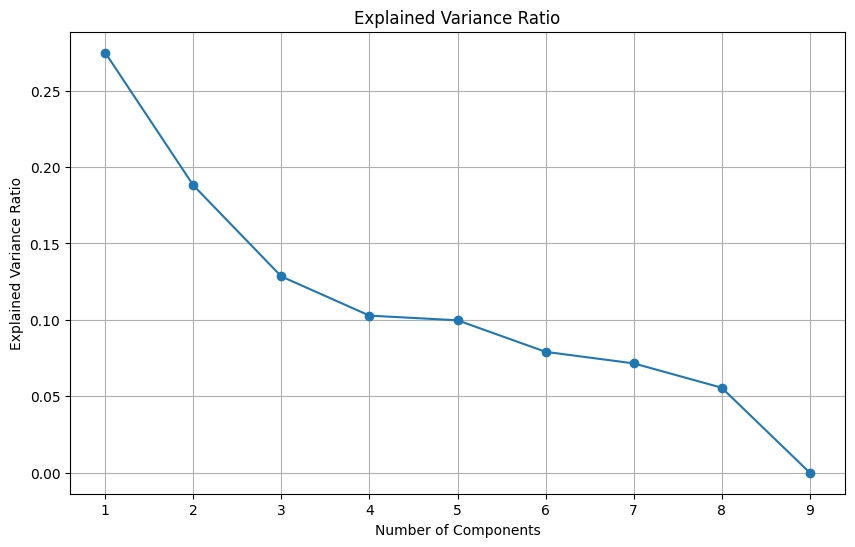

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming inc1 is your dataframe containing the features
inc1= env_df


# Step 2: Apply PCA
pca = PCA()
pca.fit(inc1)

# Step 3: Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Step 4: Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()


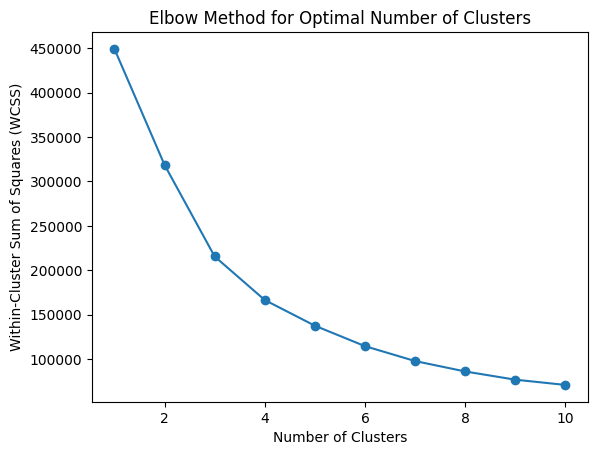

In [ ]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(inc1)

# Step 3: Plot elbow plot to determine the number of clusters
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(pca_result)
    wcss.append(kmeans.inertia_)

# Plot the elbow plot
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# Step 4: Apply K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(pca_result)

# Step 5: Assign cluster labels to each point in the DataFrame
inc1['Cluster'] = cluster_labels

# Print the DataFrame with cluster labels assigned
#print(inc1.head())


In [ ]:
# Step 1: Analyze Cluster Characteristics and Calculate Summary Statistics

# Calculate mean and standard deviation for each feature within each cluster
cluster_summary_stats = inc1.groupby('Cluster').agg(['mean'])

# Print the mean and standard deviation for each feature within each cluster
# print(cluster_summary_stats)
cl=pd.DataFrame(cluster_summary_stats)

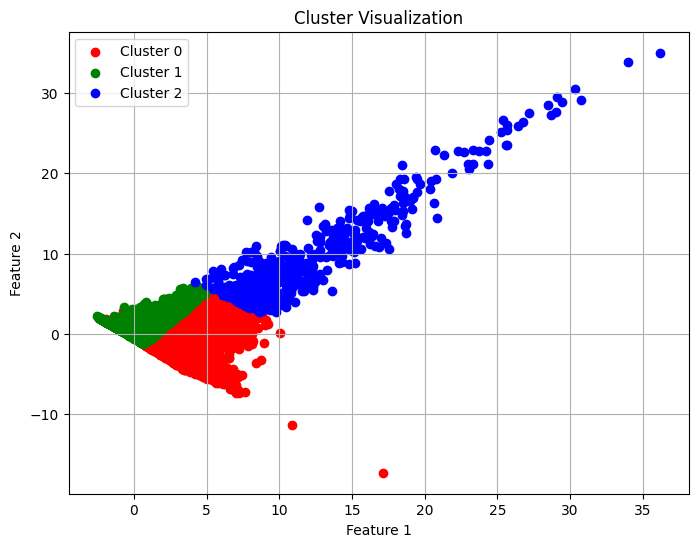

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have your data points and cluster labels
# data_points = ...
# cluster_labels = ...

# Plotting the clusters
plt.figure(figsize=(8, 6))

# Define colors for each cluster
colors = ['r', 'g', 'b']

for cluster_id in range(len(set(cluster_labels))):
    # Filter data points for the current cluster
    cluster_data = pca_result[cluster_labels == cluster_id]

    # Plot data points for the current cluster
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], color=colors[cluster_id], label=f'Cluster {cluster_id}')

# Add labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Cluster Visualization')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [ ]:
nmn=cl.transpose()

In [ ]:
nmn

Cluster                                 0         1          2
ACS_PCT_HU_COAL            mean  0.152735 -0.098683  10.691074
WUSTL_AVG_PM25             mean -0.574538  0.102030  -0.530050
ACS_PCT_HU_OIL             mean  0.988317 -0.183620   2.107261
ACS_PCT_HU_OTHER           mean  0.930743 -0.163600   0.610043
ACS_PCT_HU_SOLAR           mean  0.008975 -0.001356  -0.026844
ACS_PCT_HU_UTILITY_GAS     mean -0.998454  0.178286  -1.064875
ACS_PCT_HU_WOOD            mean  1.449638 -0.258123   1.438834
ACS_PCT_HU_BOT_TANK_LP_GAS mean  1.722697 -0.299675   0.667639
ACS_PCT_HU_COAL            mean  0.152735 -0.098683  10.691074

In [ ]:
pca_result = pd.DataFrame(pca_result)

In [ ]:
pca_result['Cluster']= cluster_labels

In [ ]:
cluster_centers = kmeans.cluster_centers_

In [ ]:
def inverse_distance_weighting(data_point_scaled, cluster_centers, risk_levels):
    # Calculate inverse distances
    distances = np.linalg.norm(cluster_centers - data_point_scaled, axis=1)
    inverse_distances = 1 / distances

    # Handle infinity values in case a point is exactly on a cluster center
    inverse_distances = np.nan_to_num(inverse_distances, nan=np.inf)

    # Weight risk levels by inverse distances and normalize
    weighted_risk_score = np.dot(inverse_distances, risk_levels) / np.sum(inverse_distances)

    return weighted_risk_score

In [ ]:
# Assuming X, cluster_centers, and risk_levels are defined
# X: Data points
# cluster_centers: Cluster centers obtained from KMeans
# risk_levels: Risk levels associated with each cluster
risk_levels = [1,0.05,0.5]
# Initialize an empty list to store risk scores for all data points
all_risk_scores = []
X = pca_result.drop(columns=['Cluster']).values
# Iterate over each data point in X
for data_point in X:
    # Calculate the risk score for the current data point
    risk_score = inverse_distance_weighting(data_point, cluster_centers, risk_levels)
    # Append the risk score to the list
    all_risk_scores.append(risk_score)

# Convert the list of risk scores to a NumPy array for easier manipulation
all_risk_scores = np.array(all_risk_scores)

# Print or further process the risk scores
# print("Risk scores for all data points:")
# print(all_risk_scores)

In [ ]:
env_df['Score'] = all_risk_scores

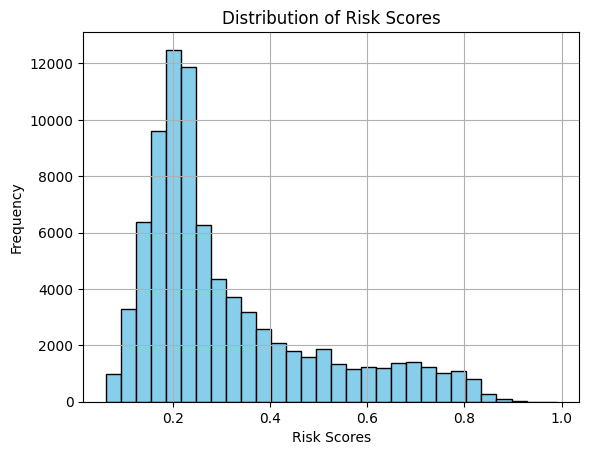

In [ ]:
import matplotlib.pyplot as plt

# Assuming all_risk_scores is defined and contains the risk scores for all data points

# Plot histogram of risk scores
plt.hist(all_risk_scores, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Risk Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Risk Scores')
plt.grid(True)
plt.show()


In [ ]:
df1 = pd.DataFrame(scaler.inverse_transform(df))
df1.columns = df.columns
scaler.fit(df1[col2])
df2 = pd.DataFrame(scaler.inverse_transform(nmn.transpose()))
df2.columns = df1[col2].columns
df2

ACS_PCT_HU_COAL  WUSTL_AVG_PM25  ACS_PCT_HU_OIL  ACS_PCT_HU_OTHER  \
0         0.215504        6.515458       16.420371          1.811178   
1         0.023526        7.998060        2.297832          0.278830   
2         8.262387        6.612946       29.904321          1.362119   

   ACS_PCT_HU_SOLAR  ACS_PCT_HU_UTILITY_GAS  ACS_PCT_HU_WOOD  \
0          0.195672               17.164377         9.653496   
1          0.186808               52.665955         0.534461   
2          0.164938               15.160494         9.595802   

   ACS_PCT_HU_BOT_TANK_LP_GAS  ACS_PCT_HU_COAL  
0                   22.309191         0.215504  
1                    2.366986         0.023526  
2                   11.905473         8.262387

Cluster 0: High Pollution, High Risk
- ACS_PCT_HU_COAL: Above average percentage of occupied housing units with coal or coke heating.
- WUSTL_AVG_PM25: Above average annual mean of Particulate Matter (PM2.5) concentration.
- ACS_PCT_HU_OIL: Above average percentage of occupied housing units with fuel oil heating.
- ACS_PCT_HU_OTHER: Above average percentage of occupied housing units with other heating fuel.
- ACS_PCT_HU_SOLAR: Below average percentage of occupied housing units with solar energy.
- ACS_PCT_HU_UTILITY_GAS: Below average percentage of occupied housing units with utility gas heating.
- ACS_PCT_HU_WOOD: Above average percentage of occupied housing units with wood heating.
- ACS_PCT_HU_BOT_TANK_LP_GAS: Above average percentage of occupied housing units with bottled, tank, or LP gas.

Rationale: This cluster represents areas with high pollution levels, indicated by above-average PM2.5 concentrations and a high prevalence of housing units using coal, oil, and wood heating. These environmental conditions can pose significant health risks, including respiratory issues and cardiovascular problems, due to exposure to particulate matter and other pollutants.

Cluster 1: Low Pollution, Low Risk
- ACS_PCT_HU_COAL: Below average percentage of occupied housing units with coal or coke heating.
- WUSTL_AVG_PM25: Average annual mean of Particulate Matter (PM2.5) concentration.
- ACS_PCT_HU_OIL: Below average percentage of occupied housing units with fuel oil heating.
- ACS_PCT_HU_OTHER: Below average percentage of occupied housing units with other heating fuel.
- ACS_PCT_HU_SOLAR: Below average percentage of occupied housing units with solar energy.
- ACS_PCT_HU_UTILITY_GAS: Above average percentage of occupied housing units with utility gas heating.
- ACS_PCT_HU_WOOD: Below average percentage of occupied housing units with wood heating.
- ACS_PCT_HU_BOT_TANK_LP_GAS: Below average percentage of occupied housing units with bottled, tank, or LP gas.

Rationale: This cluster represents areas with low pollution levels, indicated by below-average PM2.5 concentrations and a prevalence of housing units using utility gas or other cleaner heating sources. These environmental conditions are associated with lower health risks compared to areas with higher pollution levels.

Cluster 2: Mixed Pollution, Mixed Risk
- ACS_PCT_HU_COAL: Above average percentage of occupied housing units with coal or coke heating.
- WUSTL_AVG_PM25: Below average annual mean of Particulate Matter (PM2.5) concentration.
- ACS_PCT_HU_OIL: Above average percentage of occupied housing units with fuel oil heating.
- ACS_PCT_HU_OTHER: Average percentage of occupied housing units with other heating fuel.
- ACS_PCT_HU_SOLAR: Below average percentage of occupied housing units with solar energy.
- ACS_PCT_HU_UTILITY_GAS: Below average percentage of occupied housing units with utility gas heating.
- ACS_PCT_HU_WOOD: Above average percentage of occupied housing units with wood heating.
- ACS_PCT_HU_BOT_TANK_LP_GAS: Average percentage of occupied housing units with bottled, tank, or LP gas.

Rationale: This cluster represents areas with mixed pollution levels, indicated by a mix of high and low percentages of housing units using coal, oil, and wood heating. The PM2.5 concentration is below average. The health risks in these areas might vary depending on specific environmental conditions and the prevalence of cleaner heating sources.

In [ ]:
env_df.to_csv('env_df.csv')

# Access To Technology

In [ ]:
import pandas as pd
import numpy as np
import plotly as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('imputed_chosen280_variables.csv')

In [ ]:
df.drop(columns = ['Unnamed: 0'],inplace = True)

In [ ]:
# Extract numeric columns and normalize them
scaler = StandardScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df)
df

0         1         2         3         4         5         6    \
0     -0.403541  1.277722 -1.154109 -1.114473 -0.240481  0.018059 -0.379630   
1     -0.403541 -1.060705 -1.264271 -0.778113  0.441184 -0.419313  1.661023   
2     -0.403541 -0.017110 -0.104572 -0.140095  0.056260 -0.353427 -0.015013   
3      0.444834 -0.361461 -0.197372 -0.531633 -0.845862  0.602622 -0.381130   
4     -0.403541 -0.656619  0.261838  0.574010 -0.214586  1.109384 -0.568690   
...         ...       ...       ...       ...       ...       ...       ...   
84409  1.682626  1.089734 -0.445836 -0.650058 -0.622606 -0.106704 -0.703734   
84410 -0.014123 -0.530123 -0.980483 -0.256611 -0.777975 -0.659026  0.397619   
84411 -0.403541 -0.054005 -0.772731 -0.239693 -0.381853  0.414777 -0.334616   
84412 -0.403541  0.198988 -0.354833 -0.873113 -0.773076 -1.094294 -1.042842   
84413 -0.403541 -0.774331 -0.121336 -0.810213 -0.803170 -0.333801 -0.654218   

            7         8         9    ...       270       271       272  \
0      0.541708 -0.942251 -0.033752  ...  0.615285 -0.141401  0.559106   
1     -1.556369  0.921541 -0.675091  ... -0.103794  0.892784  0.819151   
2      0.313192 -0.769992  0.118003  ... -0.477505 -0.141401 -0.178976   
3      1.073833 -0.734693  0.212565  ...  1.602110 -0.141401 -0.740262   
4      1.012982 -0.853298  0.708249  ...  0.830267 -0.141401 -0.318010   
...         ...       ...       ...  ...       ...       ...       ...   
84409  1.617611 -1.447734 -1.703064  ... -0.237667 -0.141401 -0.945380   
84410 -0.453924  0.447827 -0.334213  ... -0.100305 -0.141401 -0.893028   
84411  1.185178 -1.022733 -0.389882  ... -0.265139 -0.141401 -0.843250   
84412  0.323549 -1.094037 -0.881753  ... -0.494076 -0.073462 -1.007173   
84413  0.670531 -0.757990 -0.678904  ... -0.795400  2.289311 -0.217597   

            273       274       275       276       277       278       279  
0     -0.758684 -0.792701  0.908318 -0.630869 -1.176672  0.198383 -0.220984  
1     -0.784995  0.427974  0.912508 -0.312182 -1.217139  0.191374 -0.652763  
2     -0.258779 -0.817869  0.577745 -0.630869 -0.158984  0.172500  1.015423  
3     -0.523140 -0.739847  0.695075 -0.630869 -0.028588 -0.812220 -0.292381  
4     -0.098408 -0.926094  0.561449 -0.630869  0.227707  3.568909 -0.371710  
...         ...       ...       ...       ...       ...       ...       ...  
84409 -0.772466 -1.029285  0.853377  1.379311 -0.397294  0.335912  0.592710  
84410 -0.784995 -0.440341  0.465070 -0.459268 -1.021546  0.379723  2.223498  
84411 -0.332700 -1.165195  0.451568 -0.630869 -0.809465  0.379723  1.133284  
84412 -0.524392 -0.976431  0.792384  0.790965 -0.264650 -0.812220  0.993890  
84413 -0.665970 -0.160970  0.860361  0.668394 -0.097533 -0.812220  1.046021  

[84414 rows x 280 columns]

In [ ]:
df.columns = scaler.get_feature_names_out()

In [ ]:
str3 = """ACS_PCT_HH_BROADBAND
ACS_PCT_HH_BROADBAND_ANY
ACS_PCT_HH_BROADBAND_ONLY
ACS_PCT_HH_CELLULAR
ACS_PCT_HH_CELLULAR_ONLY
ACS_PCT_HH_DIAL_INTERNET_ONLY
ACS_PCT_HH_INTERNET
ACS_PCT_HH_INTERNET_NO_SUBS
ACS_PCT_HH_NO_COMP_DEV
ACS_PCT_HH_NO_INTERNET
ACS_PCT_HH_OTHER_COMP
ACS_PCT_HH_OTHER_COMP_ONLY
ACS_PCT_HH_PC
ACS_PCT_HH_PC_ONLY
ACS_PCT_HH_SAT_INTERNET
ACS_PCT_HH_SMARTPHONE
ACS_PCT_HH_SMARTPHONE_ONLY
ACS_PCT_HH_TABLET
ACS_PCT_HH_TABLET_ONLY"""


In [ ]:
list1 = ['ACS_MEDIAN_HH_INC_NHPI',
'ACS_MDN_GRNDPRNT_NO_PRNT_INC',
'ACS_MEDIAN_HH_INC_AIAN',
'ACS_MDN_GRNDPRNT_INC',
'ACS_PCT_POV_NHPI',
'ACS_PCT_NHPI_FEMALE',
'ACS_PCT_NHPI_MALE',
'ACS_MEDIAN_HH_INC_OTHER',
'ACS_MEDIAN_HH_INC_ASIAN',
'ACS_MEDIAN_HH_INC_MULTI',
'ACS_MEDIAN_HH_INC_BLACK',
'ACS_PCT_POV_AIAN'
]

In [ ]:
col2 = str3.split('\n')

In [ ]:
col2 = [x for x in col2 if x not in list1]

In [ ]:
att_df = df[col2]

In [ ]:
att_df.shape

(84414, 19)

In [ ]:
from sklearn.cluster import KMeans

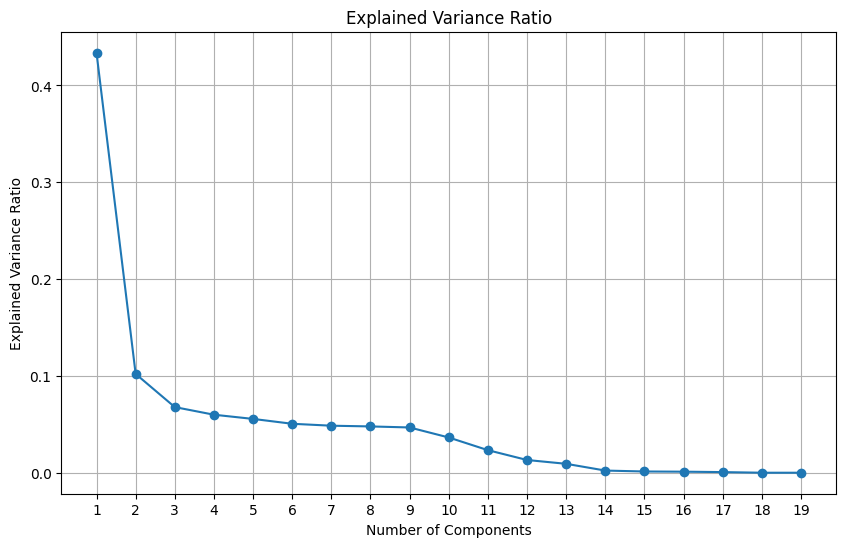

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming inc1 is your dataframe containing the features
inc1=att_df


# Step 2: Apply PCA
pca = PCA()
pca.fit(inc1)

# Step 3: Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Step 4: Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()



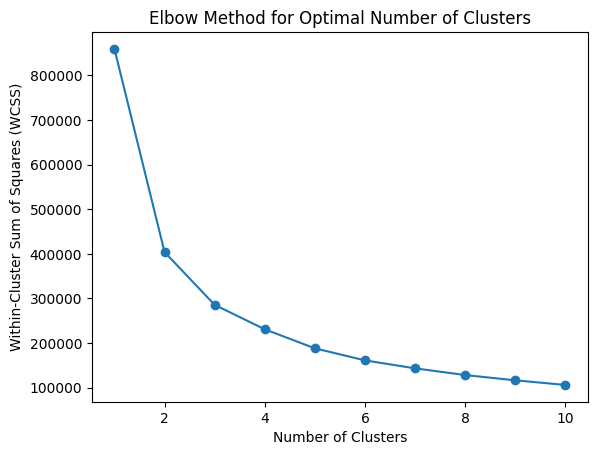

In [ ]:

pca = PCA(n_components=2)
pca_result = pca.fit_transform(inc1)

# Step 3: Plot elbow plot to determine the number of clusters
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(pca_result)
    wcss.append(kmeans.inertia_)

# Plot the elbow plot
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()


In [ ]:

from sklearn.cluster import KMeans

# Step 4: Apply K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(pca_result)

# Step 5: Assign cluster labels to each point in the DataFrame
inc1['Cluster'] = cluster_labels

# Print the DataFrame with cluster labels assigned
# print(inc1.head())



Silhouette Score: 0.4461710964434675


In [ ]:

# Step 1: Analyze Cluster Characteristics and Calculate Summary Statistics

# Calculate mean and standard deviation for each feature within each cluster
cluster_summary_stats = inc1.groupby('Cluster').agg(['mean', 'std'])

# Print the mean and standard deviation for each feature within each cluster
# print(cluster_summary_stats)
cl=pd.DataFrame(cluster_summary_stats)

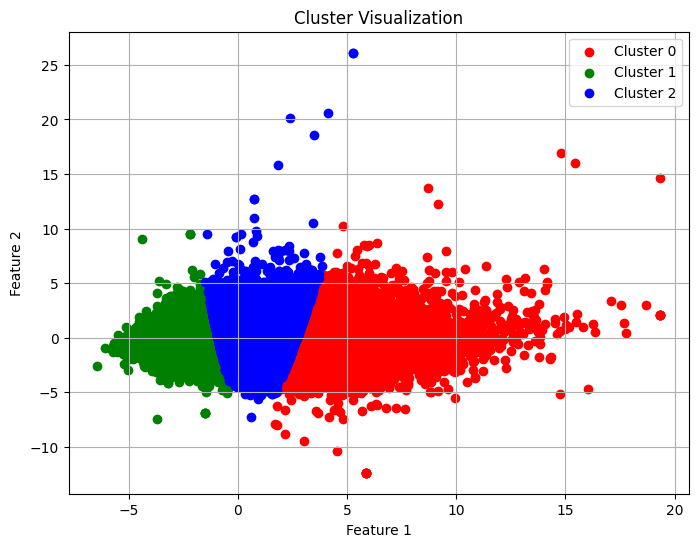

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have your data points and cluster labels
# data_points = ...
# cluster_labels = ...

# Plotting the clusters
plt.figure(figsize=(8, 6))

# Define colors for each cluster
colors = ['r', 'g', 'b']

for cluster_id in range(len(set(cluster_labels))):
    # Filter data points for the current cluster
    cluster_data = pca_result[cluster_labels == cluster_id]

    # Plot data points for the current cluster
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], color=colors[cluster_id], label=f'Cluster {cluster_id}')

# Add labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Cluster Visualization')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [ ]:
nmn=cl.transpose()

In [ ]:
nmn

Cluster                                    0         1         2
ACS_PCT_HH_BROADBAND          mean -1.487442  0.818311 -0.225478
                              std   0.702486  0.472112  0.587762
ACS_PCT_HH_BROADBAND_ANY      mean -1.583007  0.806389 -0.173041
                              std   0.915087  0.354747  0.468993
ACS_PCT_HH_BROADBAND_ONLY     mean  0.005265 -0.260891  0.268502
                              std   1.067174  0.809231  1.075765
ACS_PCT_HH_CELLULAR           mean -1.377868  0.823251 -0.276545
                              std   0.858381  0.473378  0.582915
ACS_PCT_HH_CELLULAR_ONLY      mean  0.805780 -0.488803  0.169365
                              std   1.190922  0.692436  0.903329
ACS_PCT_HH_DIAL_INTERNET_ONLY mean  0.086457 -0.148335  0.117670
                              std   1.253101  0.673872  1.134740
ACS_PCT_HH_INTERNET           mean -1.586640  0.801324 -0.166262
                              std   0.920014  0.354168  0.471711
ACS_PCT_HH_INTERNET_NO_SUBS   mean  0.408223 -0.271405  0.110466
                              std   1.513798  0.591600  0.987199
ACS_PCT_HH_NO_COMP_DEV        mean  1.455688 -0.724650  0.141607
                              std   1.143785  0.350231  0.572548
ACS_PCT_HH_NO_INTERNET        mean  1.597995 -0.782179  0.141636
                              std   0.964927  0.329902  0.477620
ACS_PCT_HH_OTHER_COMP         mean -0.250797  0.195951 -0.098175
                              std   0.915901  1.100416  0.879165
ACS_PCT_HH_OTHER_COMP_ONLY    mean  0.034497 -0.032968  0.019746
                              std   1.271207  0.871397  0.994763
ACS_PCT_HH_PC                 mean -1.530998  0.823896 -0.213012
                              std   0.753538  0.428773  0.543728
ACS_PCT_HH_PC_ONLY            mean  0.105488 -0.322551  0.290463
                              std   1.164371  0.733535  1.064543
ACS_PCT_HH_SAT_INTERNET       mean  0.175622 -0.112561  0.043166
                              std   1.165244  0.884531  1.023687
ACS_PCT_HH_SMARTPHONE         mean -1.187807  0.750801 -0.281054
                              std   1.041967  0.501667  0.696547
ACS_PCT_HH_SMARTPHONE_ONLY    mean  1.223526 -0.633111  0.143959
                              std   1.171430  0.479870  0.760529
ACS_PCT_HH_TABLET             mean -1.342062  0.815997 -0.284030
                              std   0.678375  0.639053  0.559914
ACS_PCT_HH_TABLET_ONLY        mean  0.315613 -0.280329  0.158555
                              std   1.388230  0.636290  1.039449

In [ ]:
pca_result = pd.DataFrame(pca_result)

In [ ]:
pca_result['Cluster']= cluster_labels

In [ ]:
cluster_centers = kmeans.cluster_centers_

In [ ]:
def inverse_distance_weighting(data_point_scaled, cluster_centers, risk_levels):
    # Calculate inverse distances
    distances = np.linalg.norm(cluster_centers - data_point_scaled, axis=1)
    inverse_distances = 1 / distances

    # Handle infinity values in case a point is exactly on a cluster center
    inverse_distances = np.nan_to_num(inverse_distances, nan=np.inf)

    # Weight risk levels by inverse distances and normalize
    weighted_risk_score = np.dot(inverse_distances, risk_levels) / np.sum(inverse_distances)

    return weighted_risk_score

In [ ]:
# Assuming X, cluster_centers, and risk_levels are defined
# X: Data points
# cluster_centers: Cluster centers obtained from KMeans
# risk_levels: Risk levels associated with each cluster
risk_levels = [0.05,1,0.5]
# Initialize an empty list to store risk scores for all data points
all_risk_scores = []
X = pca_result.drop(columns=['Cluster']).values
# Iterate over each data point in X
for data_point in X:
    # Calculate the risk score for the current data point
    risk_score = inverse_distance_weighting(data_point, cluster_centers, risk_levels)
    # Append the risk score to the list
    all_risk_scores.append(risk_score)

# Convert the list of risk scores to a NumPy array for easier manipulation
all_risk_scores = np.array(all_risk_scores)

# Print or further process the risk scores
# print("Risk scores for all data points:")
# print(all_risk_scores)

In [ ]:
att_df['Score'] = all_risk_scores

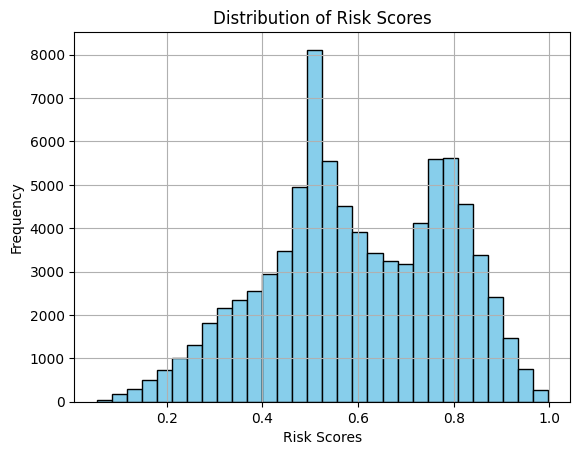

In [ ]:
import matplotlib.pyplot as plt

# Assuming all_risk_scores is defined and contains the risk scores for all data points

# Plot histogram of risk scores
plt.hist(all_risk_scores, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Risk Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Risk Scores')
plt.grid(True)
plt.show()


**Cluster 0:**

- **High Levels of Technology Access:**
  - Higher percentages in the categories of ACS_PCT_HH_BROADBAND, ACS_PCT_HH_CELLULAR, ACS_PCT_HH_INTERNET, ACS_PCT_HH_PC, ACS_PCT_HH_SMARTPHONE, and ACS_PCT_HH_TABLET.
- **Moderate to Low Risk for Healthcare:**
  - This cluster represents households with significant access to various types of technology, including broadband, cellular data plans, internet subscriptions, desktops/laptops, smartphones, and tablets.
  - Access to such technology indicates potential for utilizing telemedicine services, accessing online healthcare resources, and receiving virtual consultations, reducing the overall risk for healthcare access barriers.

**Cluster 1:**

- **Moderate Levels of Technology Access:**
  - Moderate percentages in various categories, indicating a mix of technology access levels across different types of households.
- **Moderate Risk for Healthcare:**
  - This cluster includes households with varying levels of technology access. While some households have access to broadband, cellular data plans, and internet subscriptions, others may have limited access or reliance on specific types of devices.
  - The moderate risk level suggests potential challenges in accessing healthcare services for households with limited or selective technology access.

**Cluster 2:**

- **Low Levels of Technology Access:**
  - Higher percentages in categories such as ACS_PCT_HH_NO_COMP_DEV, ACS_PCT_HH_NO_INTERNET, ACS_PCT_HH_SMARTPHONE_ONLY, and ACS_PCT_HH_TABLET_ONLY.
- **High Risk for Healthcare:**
  - This cluster represents households with limited access to technology, including no computing devices, no internet access, and reliance solely on smartphones or tablets.
  - Limited technology access poses significant barriers to accessing healthcare services, as these households may struggle to participate in telemedicine consultations, access online health resources, or communicate with healthcare providers digitally. Thus, they are at a higher risk for healthcare disparities and limited healthcare access.

In [ ]:
att_df.to_csv('att_df.csv')

# Economic Instability

In [ ]:
import pandas as pd
import numpy as np
import plotly as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('imputed_chosen280_variables.csv')

In [ ]:
df.drop(columns = ['Unnamed: 0'],inplace = True)

In [ ]:
# Extract numeric columns and normalize them
scaler = StandardScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df)
df

0         1         2         3         4         5         6    \
0     -0.403541  1.277722 -1.154109 -1.114473 -0.240481  0.018059 -0.379630   
1     -0.403541 -1.060705 -1.264271 -0.778113  0.441184 -0.419313  1.661023   
2     -0.403541 -0.017110 -0.104572 -0.140095  0.056260 -0.353427 -0.015013   
3      0.444834 -0.361461 -0.197372 -0.531633 -0.845862  0.602622 -0.381130   
4     -0.403541 -0.656619  0.261838  0.574010 -0.214586  1.109384 -0.568690   
...         ...       ...       ...       ...       ...       ...       ...   
84409  1.682626  1.089734 -0.445836 -0.650058 -0.622606 -0.106704 -0.703734   
84410 -0.014123 -0.530123 -0.980483 -0.256611 -0.777975 -0.659026  0.397619   
84411 -0.403541 -0.054005 -0.772731 -0.239693 -0.381853  0.414777 -0.334616   
84412 -0.403541  0.198988 -0.354833 -0.873113 -0.773076 -1.094294 -1.042842   
84413 -0.403541 -0.774331 -0.121336 -0.810213 -0.803170 -0.333801 -0.654218   

            7         8         9    ...       270       271       272  \
0      0.541708 -0.942251 -0.033752  ...  0.615285 -0.141401  0.559106   
1     -1.556369  0.921541 -0.675091  ... -0.103794  0.892784  0.819151   
2      0.313192 -0.769992  0.118003  ... -0.477505 -0.141401 -0.178976   
3      1.073833 -0.734693  0.212565  ...  1.602110 -0.141401 -0.740262   
4      1.012982 -0.853298  0.708249  ...  0.830267 -0.141401 -0.318010   
...         ...       ...       ...  ...       ...       ...       ...   
84409  1.617611 -1.447734 -1.703064  ... -0.237667 -0.141401 -0.945380   
84410 -0.453924  0.447827 -0.334213  ... -0.100305 -0.141401 -0.893028   
84411  1.185178 -1.022733 -0.389882  ... -0.265139 -0.141401 -0.843250   
84412  0.323549 -1.094037 -0.881753  ... -0.494076 -0.073462 -1.007173   
84413  0.670531 -0.757990 -0.678904  ... -0.795400  2.289311 -0.217597   

            273       274       275       276       277       278       279  
0     -0.758684 -0.792701  0.908318 -0.630869 -1.176672  0.198383 -0.220984  
1     -0.784995  0.427974  0.912508 -0.312182 -1.217139  0.191374 -0.652763  
2     -0.258779 -0.817869  0.577745 -0.630869 -0.158984  0.172500  1.015423  
3     -0.523140 -0.739847  0.695075 -0.630869 -0.028588 -0.812220 -0.292381  
4     -0.098408 -0.926094  0.561449 -0.630869  0.227707  3.568909 -0.371710  
...         ...       ...       ...       ...       ...       ...       ...  
84409 -0.772466 -1.029285  0.853377  1.379311 -0.397294  0.335912  0.592710  
84410 -0.784995 -0.440341  0.465070 -0.459268 -1.021546  0.379723  2.223498  
84411 -0.332700 -1.165195  0.451568 -0.630869 -0.809465  0.379723  1.133284  
84412 -0.524392 -0.976431  0.792384  0.790965 -0.264650 -0.812220  0.993890  
84413 -0.665970 -0.160970  0.860361  0.668394 -0.097533 -0.812220  1.046021  

[84414 rows x 280 columns]

In [ ]:
df.columns = scaler.get_feature_names_out()

In [ ]:
str3="""ACS_GINI_INDEX
ACS_MEDIAN_HH_INC
ACS_MEDIAN_HH_INC_AIAN
ACS_MEDIAN_HH_INC_ASIAN
ACS_MEDIAN_HH_INC_BLACK
ACS_MEDIAN_HH_INC_HISP
ACS_MEDIAN_HH_INC_MULTI
ACS_MEDIAN_HH_INC_NHPI
ACS_MEDIAN_HH_INC_OTHER
ACS_MEDIAN_HH_INC_WHITE
ACS_MEDIAN_INC_F
ACS_MEDIAN_INC_M
ACS_MEDIAN_NONVET_INC
ACS_MEDIAN_VET_INC
ACS_PCT_HEALTH_INC_138_199
ACS_PCT_HEALTH_INC_200_399
ACS_PCT_HEALTH_INC_ABOVE400
ACS_PCT_HEALTH_INC_BELOW137
ACS_PCT_HH_FOOD_STMP_BLW_POV
ACS_PCT_HH_INC_10000
ACS_PCT_HH_INC_100000
ACS_PCT_HH_INC_14999
ACS_PCT_HH_INC_24999
ACS_PCT_HH_INC_49999
ACS_PCT_HH_INC_99999
ACS_PCT_HH_NO_FD_STMP_BLW_POV
ACS_PCT_HH_PUB_ASSIST"""

In [ ]:
list1 = ['ACS_MEDIAN_HH_INC_NHPI',
'ACS_MDN_GRNDPRNT_NO_PRNT_INC',
'ACS_MEDIAN_HH_INC_AIAN',
'ACS_MDN_GRNDPRNT_INC',
'ACS_PCT_POV_NHPI',
'ACS_PCT_NHPI_FEMALE',
'ACS_PCT_NHPI_MALE',
'ACS_MEDIAN_HH_INC_OTHER',
'ACS_MEDIAN_HH_INC_ASIAN',
'ACS_MEDIAN_HH_INC_MULTI',
'ACS_MEDIAN_HH_INC_BLACK',
'ACS_PCT_POV_AIAN'
]

In [ ]:
col2 = str3.split('\n')

In [ ]:
col2 = [x for x in col2 if x not in list1]

In [ ]:
inc_df=df[col2]

In [ ]:
inc_df.shape

(84414, 21)

In [ ]:
from sklearn.cluster import KMeans

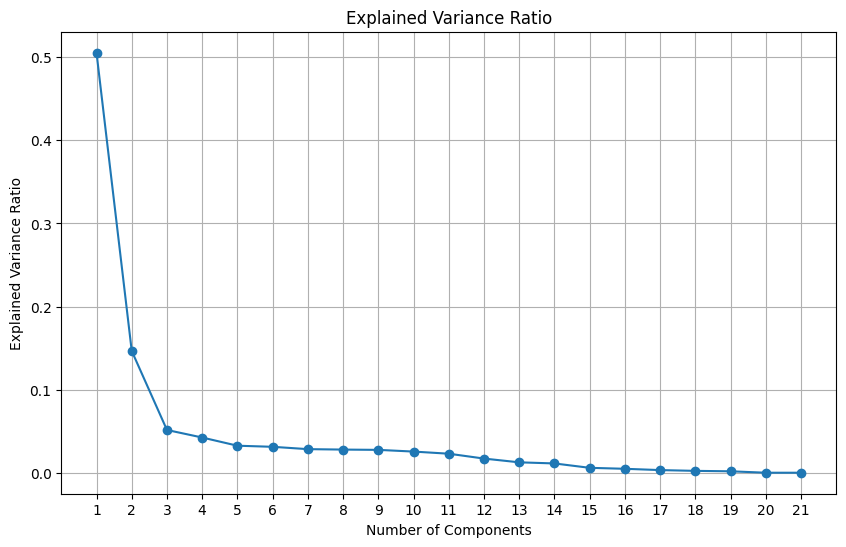

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming inc1 is your dataframe containing the features
inc1=inc_df


# Step 2: Apply PCA
pca = PCA()
pca.fit(inc1)

# Step 3: Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Step 4: Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()


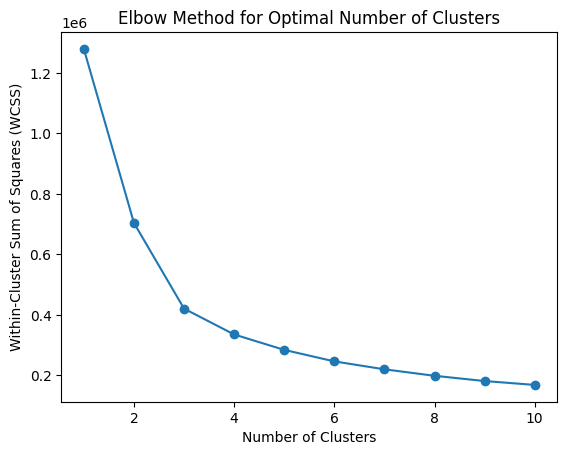

In [ ]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(inc1)

# Step 3: Plot elbow plot to determine the number of clusters
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(pca_result)
    wcss.append(kmeans.inertia_)

# Plot the elbow plot
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# Step 4: Apply K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(pca_result)

# Step 5: Assign cluster labels to each point in the DataFrame
inc1['Cluster'] = cluster_labels

# Print the DataFrame with cluster labels assigned
# print(inc1.head())

In [ ]:
from sklearn.metrics import silhouette_score

# Assuming cluster_labels contains the cluster labels assigned by K-means clustering
# Assuming pca_result contains the PCA-transformed data

# Calculate silhouette score
silhouette_avg = silhouette_score(inc_df.drop('Cluster',axis=1), cluster_labels)

# Print the silhouette score
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.24465100341648563


In [ ]:
# inc1.drop('Cluster',axis=1,inplace=True)

In [ ]:
# Step 1: Analyze Cluster Characteristics and Calculate Summary Statistics

# Calculate mean and standard deviation for each feature within each cluster
cluster_summary_stats = inc1.groupby('Cluster').agg(['mean'])

# Print the mean and standard deviation for each feature within each cluster
# print(cluster_summary_stats)
cl=pd.DataFrame(cluster_summary_stats)

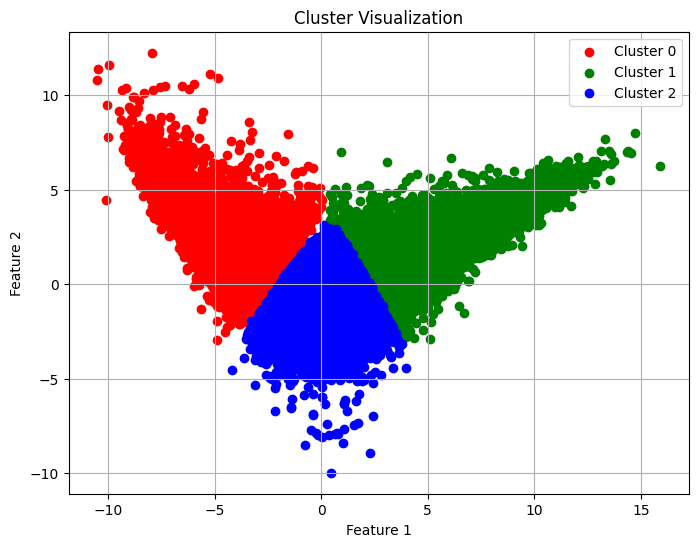

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have your data points and cluster labels
# data_points = ...
# cluster_labels = ...

# Plotting the clusters
plt.figure(figsize=(8, 6))

# Define colors for each cluster
colors = ['r', 'g', 'b']

for cluster_id in range(len(set(cluster_labels))):
    # Filter data points for the current cluster
    cluster_data = pca_result[cluster_labels == cluster_id]

    # Plot data points for the current cluster
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], color=colors[cluster_id], label=f'Cluster {cluster_id}')

# Add labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Cluster Visualization')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [ ]:
nmn=cl.transpose()

In [ ]:
nmn

Cluster                                    0         1         2
ACS_GINI_INDEX                mean  0.647129 -0.158166 -0.236711
ACS_MEDIAN_HH_INC             mean -0.956892  1.411393 -0.161261
ACS_MEDIAN_HH_INC_HISP        mean -0.578127  0.960625 -0.144280
ACS_MEDIAN_HH_INC_WHITE       mean -0.778642  1.330627 -0.210310
ACS_MEDIAN_INC_F              mean -0.841647  1.190463 -0.119718
ACS_MEDIAN_INC_M              mean -0.835267  1.310785 -0.174973
ACS_MEDIAN_NONVET_INC         mean -0.895128  1.339914 -0.159371
ACS_MEDIAN_VET_INC            mean -0.528221  0.935334 -0.156849
ACS_PCT_HEALTH_INC_138_199    mean  0.663085 -0.923345  0.088001
ACS_PCT_HEALTH_INC_200_399    mean -0.183382 -0.938247  0.493927
ACS_PCT_HEALTH_INC_ABOVE400   mean -1.053415  1.394005 -0.108161
ACS_PCT_HEALTH_INC_BELOW137   mean  1.325476 -0.889743 -0.239178
ACS_PCT_HH_FOOD_STMP_BLW_POV  mean  1.202967 -0.654334 -0.283580
ACS_PCT_HH_INC_10000          mean  1.077951 -0.557525 -0.266618
ACS_PCT_HH_INC_100000         mean -0.969088  1.452916 -0.173534
ACS_PCT_HH_INC_14999          mean  1.007458 -0.620937 -0.205818
ACS_PCT_HH_INC_24999          mean  1.007912 -0.839636 -0.111073
ACS_PCT_HH_INC_49999          mean  0.688289 -1.109180  0.156796
ACS_PCT_HH_INC_99999          mean -0.596553 -0.596302  0.540434
ACS_PCT_HH_NO_FD_STMP_BLW_POV mean  0.843805 -0.537994 -0.164603
ACS_PCT_HH_PUB_ASSIST         mean  1.186602 -0.781844 -0.220493

In [ ]:
pca_result = pd.DataFrame(pca_result)

In [ ]:
pca_result['Cluster']= cluster_labels

In [ ]:
cluster_centers = kmeans.cluster_centers_

In [ ]:
def inverse_distance_weighting(data_point_scaled, cluster_centers, risk_levels):
    # Calculate inverse distances
    distances = np.linalg.norm(cluster_centers - data_point_scaled, axis=1)
    inverse_distances = 1 / distances

    # Handle infinity values in case a point is exactly on a cluster center
    inverse_distances = np.nan_to_num(inverse_distances, nan=np.inf)

    # Weight risk levels by inverse distances and normalize
    weighted_risk_score = np.dot(inverse_distances, risk_levels) / np.sum(inverse_distances)

    return weighted_risk_score

In [ ]:
# Assuming X, cluster_centers, and risk_levels are defined
# X: Data points
# cluster_centers: Cluster centers obtained from KMeans
# risk_levels: Risk levels associated with each cluster
risk_levels = [1,0.05,0.5]
# Initialize an empty list to store risk scores for all data points
all_risk_scores = []
X = pca_result.drop(columns=['Cluster']).values
# Iterate over each data point in X
for data_point in X:
    # Calculate the risk score for the current data point
    risk_score = inverse_distance_weighting(data_point, cluster_centers, risk_levels)
    # Append the risk score to the list
    all_risk_scores.append(risk_score)

# Convert the list of risk scores to a NumPy array for easier manipulation
all_risk_scores = np.array(all_risk_scores)

# Print or further process the risk scores
# print("Risk scores for all data points:")
# print(all_risk_scores)

In [ ]:
inc_df['Score'] = all_risk_scores

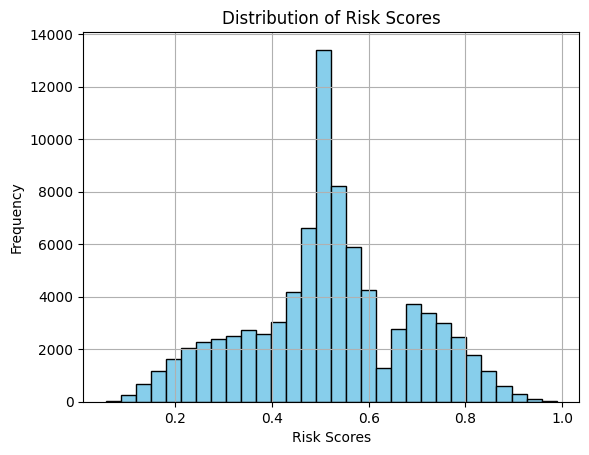

In [ ]:
import matplotlib.pyplot as plt

# Assuming all_risk_scores is defined and contains the risk scores for all data points

# Plot histogram of risk scores
plt.hist(all_risk_scores, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Risk Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Risk Scores')
plt.grid(True)
plt.show()


In [ ]:
df1 = pd.DataFrame(scaler.inverse_transform(df))
df1.columns = df.columns
scaler.fit(df1[col2])
df2 = pd.DataFrame(scaler.inverse_transform(nmn.transpose()))
df2.columns = df1[col2].columns
df2

ACS_GINI_INDEX  ACS_MEDIAN_HH_INC  ACS_MEDIAN_HH_INC_HISP  \
0        0.463679       37012.661977            51495.762068   
1        0.408099      119330.978712           103168.563627   
2        0.402678       64667.700145            66064.781187   

   ACS_MEDIAN_HH_INC_WHITE  ACS_MEDIAN_INC_F  ACS_MEDIAN_INC_M  \
0             47945.239348      18535.681058      25579.224731   
1            122244.692603      41958.423996      71518.295699   
2             67964.826957      26856.869059      39713.700972   

   ACS_MEDIAN_NONVET_INC  ACS_MEDIAN_VET_INC  ACS_PCT_HEALTH_INC_138_199  \
0           21207.116413        36768.146445                   15.447860   
1           54806.432984        69825.374842                    4.600453   
2           32267.720829        45156.304687                   11.515652   

   ACS_PCT_HEALTH_INC_200_399  ...  ACS_PCT_HEALTH_INC_BELOW137  \
0                   27.748433  ...                    39.596225   
1                   19.946185  ...                     7.507840   
2                   34.749054  ...                    16.931548   

   ACS_PCT_HH_FOOD_STMP_BLW_POV  ACS_PCT_HH_INC_10000  ACS_PCT_HH_INC_100000  \
0                     14.419037             12.953084              11.652046   
1                      0.982648              2.759701              57.158185   
2                      3.664818              4.572823              26.599411   

   ACS_PCT_HH_INC_14999  ACS_PCT_HH_INC_24999  ACS_PCT_HH_INC_49999  \
0              8.699974             15.052334             27.488157   
1              1.655082              3.624457             10.645888   
2              3.451003              8.130932             22.508064   

   ACS_PCT_HH_INC_99999  ACS_PCT_HH_NO_FD_STMP_BLW_POV  ACS_PCT_HH_PUB_ASSIST  
0             24.154451                      13.069724              26.791478  
1             24.156791                       4.208164               3.855497  
2             34.737767                       6.602745              10.396260  

[3 rows x 21 columns]

Cluster 0: High Economic Instability, Low Income, High Healthcare Risk
- **ACS_GINI_INDEX**: This cluster has the highest mean Gini index, indicating higher income inequality within the population.
- **ACS_MEDIAN_HH_INC**, **ACS_MEDIAN_HH_INC_HISP**, **ACS_MEDIAN_HH_INC_WHITE**: Lower median household incomes across various racial groups within this cluster suggest economic instability and potentially limited access to healthcare resources.
- **ACS_MEDIAN_INC_F**, **ACS_MEDIAN_INC_M**, **ACS_MEDIAN_NONVET_INC**, **ACS_MEDIAN_VET_INC**: Lower median incomes for both genders and civilian veterans within this cluster further highlight economic challenges and potential barriers to healthcare access.
- **ACS_PCT_HEALTH_INC_BELOW137**: A higher percentage of the population under the poverty threshold indicates financial vulnerability and increased healthcare risk due to potential lack of access to health insurance and healthcare services.
- **ACS_PCT_HH_FOOD_STMP_BLW_POV**, **ACS_PCT_HH_INC_10000**: Higher percentages of households receiving food stamps/SNAP and lower percentages of households with incomes below $10,000 suggest significant economic instability and heightened healthcare risks due to financial constraints.

Cluster 1: Moderate Economic Stability, High IncModerate Healthcare Risk
- **ACS_GINI_INDEX**: This cluster has a moderate mean Gini index, suggesting relatively lower income inequality compared to Cluster 0.
- **ACS_MEDIAN_HH_INC**, **ACS_MEDIAN_HH_INC_HISP**, **ACS_MEDIAN_HH_INC_WHITE**: High median household incomes across various racial groups within this cluster indicate moderate to high economic stability.
- **ACS_MEDIAN_INC_F**, **ACS_MEDIAN_INC_M**, **ACS_MEDIAN_NONVET_INC**, **ACS_MEDIAN_VET_INC**: High median incomes for both genders and civilian veterans within this cluster suggest strong economic conditions and potentially improved access to healthcare resources.
- **ACS_PCT_HEALTH_INC_138_199**, **ACS_PCT_HEALTH_INC_200_399**: Moderate percentages of the population falling within these income thresholds indicate moderate healthcare risk, likely reflecting a mix of insurance coverage and healthcare access.
- **ACS_PCT_HH_FOOD_STMP_BLW_POV**, **ACS_PCT_HH_INC_10000**: Moderate percentages of households receiving food stamps/SNAP and lower percentages of households with incomes below $10,000 suggest improved economic stability compared to Cluster 0, leading to reduced healthcare risks.

Cluster 2: Low Economic Instability, Moderate Income, Moderate Healthcare Risk
- **ACS_GINI_INDEX**: This cluster has the lowest mean Gini index, indicating lower income inequality within the population.
- **ACS_MEDIAN_HH_INC**, **ACS_MEDIAN_HH_INC_HISP**, **ACS_MEDIAN_HH_INC_WHITE**: Moderate median household incomes across various racial groups within this cluster suggest moderate economic stability.
- **ACS_MEDIAN_INC_F**, **ACS_MEDIAN_INC_M**, **ACS_MEDIAN_NONVET_INC**, **ACS_MEDIAN_VET_INC**: Moderate median incomes for both genders and civilian veterans within this cluster further highlight economic stability and potentially improved access to healthcare resources compared to Cluster 0.
- **ACS_PCT_HEALTH_INC_138_199**, **ACS_PCT_HEALTH_INC_200_399**: Moderate percentages of the population falling within these income thresholds indicate moderate healthcare risk, likely reflecting a mix of insurance coverage and healthcare access.
- **ACS_PCT_HH_FOOD_STMP_BLW_POV**, **ACS_PCT_HH_INC_10000**: Moderate percentages of households receiving food stamps/SNAP and households with incomes below $10,000 indicate moderate economic stability and healthcare risks.s to healthcare resources.re risk within each cluster.ments of the population.

In [ ]:
inc_df.to_csv('eco_df.csv')

# Social Support and Security

In [ ]:
import pandas as pd
import numpy as np
import plotly as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('imputed_chosen280_variables.csv')

In [ ]:
df.drop(columns = ['Unnamed: 0'],inplace = True)

In [ ]:
# Extract numeric columns and normalize them
scaler = StandardScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df)
df

0         1         2         3         4         5         6    \
0     -0.403541  1.277722 -1.154109 -1.114473 -0.240481  0.018059 -0.379630   
1     -0.403541 -1.060705 -1.264271 -0.778113  0.441184 -0.419313  1.661023   
2     -0.403541 -0.017110 -0.104572 -0.140095  0.056260 -0.353427 -0.015013   
3      0.444834 -0.361461 -0.197372 -0.531633 -0.845862  0.602622 -0.381130   
4     -0.403541 -0.656619  0.261838  0.574010 -0.214586  1.109384 -0.568690   
...         ...       ...       ...       ...       ...       ...       ...   
84409  1.682626  1.089734 -0.445836 -0.650058 -0.622606 -0.106704 -0.703734   
84410 -0.014123 -0.530123 -0.980483 -0.256611 -0.777975 -0.659026  0.397619   
84411 -0.403541 -0.054005 -0.772731 -0.239693 -0.381853  0.414777 -0.334616   
84412 -0.403541  0.198988 -0.354833 -0.873113 -0.773076 -1.094294 -1.042842   
84413 -0.403541 -0.774331 -0.121336 -0.810213 -0.803170 -0.333801 -0.654218   

            7         8         9    ...       270       271       272  \
0      0.541708 -0.942251 -0.033752  ...  0.615285 -0.141401  0.559106   
1     -1.556369  0.921541 -0.675091  ... -0.103794  0.892784  0.819151   
2      0.313192 -0.769992  0.118003  ... -0.477505 -0.141401 -0.178976   
3      1.073833 -0.734693  0.212565  ...  1.602110 -0.141401 -0.740262   
4      1.012982 -0.853298  0.708249  ...  0.830267 -0.141401 -0.318010   
...         ...       ...       ...  ...       ...       ...       ...   
84409  1.617611 -1.447734 -1.703064  ... -0.237667 -0.141401 -0.945380   
84410 -0.453924  0.447827 -0.334213  ... -0.100305 -0.141401 -0.893028   
84411  1.185178 -1.022733 -0.389882  ... -0.265139 -0.141401 -0.843250   
84412  0.323549 -1.094037 -0.881753  ... -0.494076 -0.073462 -1.007173   
84413  0.670531 -0.757990 -0.678904  ... -0.795400  2.289311 -0.217597   

            273       274       275       276       277       278       279  
0     -0.758684 -0.792701  0.908318 -0.630869 -1.176672  0.198383 -0.220984  
1     -0.784995  0.427974  0.912508 -0.312182 -1.217139  0.191374 -0.652763  
2     -0.258779 -0.817869  0.577745 -0.630869 -0.158984  0.172500  1.015423  
3     -0.523140 -0.739847  0.695075 -0.630869 -0.028588 -0.812220 -0.292381  
4     -0.098408 -0.926094  0.561449 -0.630869  0.227707  3.568909 -0.371710  
...         ...       ...       ...       ...       ...       ...       ...  
84409 -0.772466 -1.029285  0.853377  1.379311 -0.397294  0.335912  0.592710  
84410 -0.784995 -0.440341  0.465070 -0.459268 -1.021546  0.379723  2.223498  
84411 -0.332700 -1.165195  0.451568 -0.630869 -0.809465  0.379723  1.133284  
84412 -0.524392 -0.976431  0.792384  0.790965 -0.264650 -0.812220  0.993890  
84413 -0.665970 -0.160970  0.860361  0.668394 -0.097533 -0.812220  1.046021  

[84414 rows x 280 columns]

In [ ]:
df.columns = scaler.get_feature_names_out()

In [ ]:
str3="""ACS_AVG_HH_SIZE
ACS_PCT_AGE_0_17
ACS_PCT_AGE_0_4
ACS_PCT_AGE_10_14
ACS_PCT_AGE_15_17
ACS_PCT_AGE_18_29
ACS_PCT_AGE_18_44
ACS_PCT_AGE_30_44
ACS_PCT_AGE_45_64
ACS_PCT_AGE_50_64
ACS_PCT_AGE_5_9
ACS_PCT_AGE_ABOVE65
ACS_PCT_AGE_ABOVE80
ACS_PCT_AIAN
ACS_PCT_AIAN_COMB
ACS_PCT_AIAN_FEMALE
ACS_PCT_AIAN_MALE
ACS_PCT_AIAN_NONHISP
ACS_PCT_API_LANG
ACS_PCT_ASIAN
ACS_PCT_ASIAN_COMB
ACS_PCT_ASIAN_FEMALE
ACS_PCT_ASIAN_MALE
ACS_PCT_ASIAN_NONHISP
ACS_PCT_BLACK
ACS_PCT_BLACK_COMB
ACS_PCT_BLACK_FEMALE
ACS_PCT_BLACK_MALE
ACS_PCT_BLACK_NONHISP
ACS_PCT_ENGL_NOT_ALL
ACS_PCT_ENGL_NOT_WELL
ACS_PCT_HH_LIMIT_ENGLISH
ACS_PCT_MULT_RACE
ACS_PCT_VET
ACS_PCT_WHITE
ACS_TOT_CIVIL_VET_POP
ACS_TOT_CIVIL_VET_POP_ABOVE25
ACS_TOT_HH
ACS_TOT_POP_16_19
ACS_TOT_POP_ABOVE15
ACS_TOT_POP_ABOVE16
ACS_TOT_POP_ABOVE25
ACS_TOT_POP_ABOVE5
ACS_TOT_POP_US_ABOVE1
ACS_TOT_POP_WT
ACS_PCT_DIVORCED_F
ACS_PCT_DIVORCED_M
ACS_PCT_ENGLISH
ACS_PCT_ENGL_VERY_WELL
ACS_PCT_ENGL_WELL
ACS_PCT_FEMALE
ACS_PCT_GULFWAR_1990_2001
ACS_PCT_GULFWAR_2001
ACS_PCT_GULFWAR_VIETNAM
ACS_PCT_HISPANIC
ACS_PCT_HISP_FEMALE
ACS_PCT_HISP_MALE
ACS_PCT_HOUSEHOLDER_AIAN
ACS_PCT_HOUSEHOLDER_ASIAN
ACS_PCT_HOUSEHOLDER_BLACK
ACS_PCT_HOUSEHOLDER_MULT
ACS_PCT_HOUSEHOLDER_NHPI
ACS_PCT_HOUSEHOLDER_OTHER
ACS_PCT_HOUSEHOLDER_WHITE
ACS_PCT_MALE
ACS_PCT_MARRIED_SP_AB_F
ACS_PCT_MARRIED_SP_AB_M
ACS_PCT_MARRIED_SP_PR_F
ACS_PCT_MARRIED_SP_PR_M
ACS_PCT_MULT_RACE_FEMALE
ACS_PCT_MULT_RACE_MALE
ACS_PCT_MULT_RACE_NONHISP
ACS_PCT_NHPI
ACS_PCT_NHPI_COMB
ACS_PCT_NHPI_FEMALE
ACS_PCT_NHPI_MALE
ACS_PCT_NHPI_NONHISP
ACS_PCT_NVR_MARRIED_F
ACS_PCT_NVR_MARRIED_M
ACS_PCT_OTHER_FEMALE
ACS_PCT_OTHER_MALE
ACS_PCT_OTHER_NONHISP
ACS_PCT_OTHER_RACE
ACS_PCT_OTH_EURP
ACS_PCT_OTH_LANG
ACS_PCT_POP_SAME_SEX_SPOUSE
ACS_PCT_POP_SAME_SEX_UNMRD_P
ACS_PCT_SPANISH
ACS_PCT_VIETNAM
ACS_PCT_WHITE_COMB
ACS_PCT_WHITE_FEMALE
ACS_PCT_WHITE_MALE
ACS_PCT_WHITE_NONHISP
ACS_PCT_WIDOWED_F
ACS_PCT_WIDOWED_M
ACS_TOT_CIVIL_NONINST_POP
ACS_TOT_CIVIL_POP_ABOVE18
ACS_TOT_OWN_CHILD_BELOW17
ACS_PCT_CHILD_DISAB
ACS_PCT_DISABLE
ACS_PCT_NONVET_DISABLE_18_64
ACS_PCT_VET_DISABLE_18_64
HIFLD_DIST_UC_TRACT
CEN_AIAN_NH_IND
CEN_AREALAND_SQM_TRACT
CEN_POPDENSITY_TRACT
ACS_PCT_HU_MOBILE_HOME
ACS_PCT_OWNER_HU_COST_30PCT
ACS_PCT_OWNER_HU_COST_50PCT
ACS_PCT_RENTER_HU_ABOVE65
ACS_PCT_RENTER_HU_COST_30PCT
ACS_PCT_RENTER_HU_COST_50PCT
ACS_TOT_HU
ACS_MDN_OWNER_COST_MORTGAGE
ACS_MDN_OWNER_COST_NO_MORTG
ACS_MEDIAN_HOME_VALUE
ACS_MEDIAN_RENT
ACS_MEDIAN_YEAR_BUILT
ACS_PCT_10UNITS
ACS_PCT_1UP_OWNER_1ROOM
ACS_PCT_1UP_PERS_1ROOM
ACS_PCT_1UP_RENT_1ROOM
ACS_PCT_GRP_QRT
ACS_PCT_HU_BOT_TANK_LP_GAS
ACS_PCT_HU_BUILT_1979
ACS_PCT_HU_COAL
ACS_PCT_HU_ELEC
ACS_PCT_HU_KITCHEN
ACS_PCT_HU_NO_FUEL
ACS_PCT_HU_OIL
ACS_PCT_HU_OTHER
ACS_PCT_HU_PLUMBING
ACS_PCT_HU_SOLAR
ACS_PCT_HU_UTILITY_GAS
ACS_PCT_HU_WOOD
ACS_PCT_OWNER_HU
ACS_PCT_OWNER_HU_CHILD
ACS_PCT_RENTER_HU
ACS_PCT_RENTER_HU_CHILD
ACS_PCT_VACANT_HU
ACS_PCT_FOREIGN_BORN
ACS_PCT_CTZ_ABOVE18
ACS_PCT_CTZ_NATURALIZED
ACS_PCT_CTZ_NONUS_BORN
ACS_PCT_CTZ_US_BORN
ACS_PCT_NONCTN_1990
ACS_PCT_NONCTN_1999
ACS_PCT_NONCTN_2000
ACS_PCT_NONCTN_2010
ACS_PCT_NON_CITIZEN
ACS_PCT_CHILDREN_GRANDPARENT
ACS_PCT_CHILD_1FAM
ACS_PCT_HH_1PERS
ACS_PCT_HH_ABOVE65
ACS_PCT_HH_ALONE_ABOVE65
ACS_TOT_GRANDCHILDREN_GP
ACS_PCT_GRANDP_NO_RESPS
ACS_PCT_GRANDP_RESPS_NO_P
ACS_PCT_GRANDP_RESPS_P
ACS_PCT_HH_KID_1PRNT
ACS_PCT_DIF_STATE
ACS_PCT_IN_COUNTY_MOVE
ACS_PCT_IN_STATE_MOVE"""

In [ ]:
list1 = ['ACS_MEDIAN_HH_INC_NHPI',
'ACS_MDN_GRNDPRNT_NO_PRNT_INC',
'ACS_MEDIAN_HH_INC_AIAN',
'ACS_MDN_GRNDPRNT_INC',
'ACS_PCT_POV_NHPI',
'ACS_PCT_NHPI_FEMALE',
'ACS_PCT_NHPI_MALE',
'ACS_MEDIAN_HH_INC_OTHER',
'ACS_MEDIAN_HH_INC_ASIAN',
'ACS_MEDIAN_HH_INC_MULTI',
'ACS_MEDIAN_HH_INC_BLACK',
'ACS_PCT_POV_AIAN'
]

In [ ]:
col2 = str3.split('\n')

In [ ]:
col2 = [x for x in col2 if x not in list1]

In [ ]:
ss_df = df[col2]

In [ ]:
ss_df.shape

(84414, 161)

In [ ]:
from sklearn.cluster import KMeans

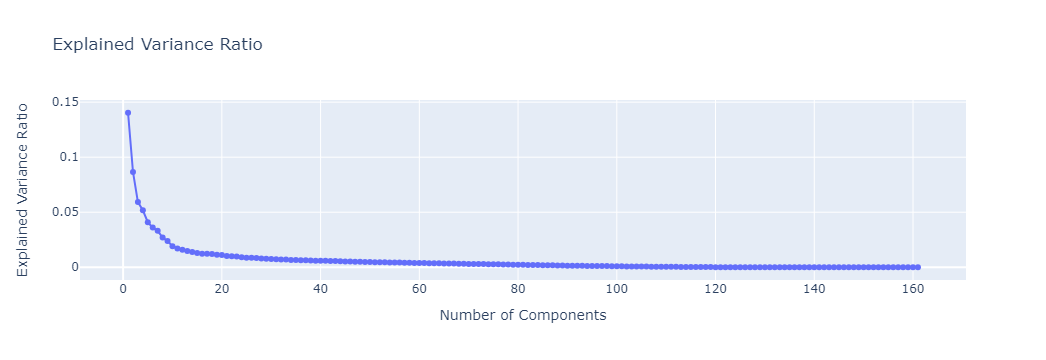

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming inc1 is your dataframe containing the features
inc1 = ss_df

# Step 2: Apply PCA
pca = PCA()
pca.fit(inc1)

# Step 3: Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Step 4: Plot the explained variance ratio using Plotly
fig = go.Figure(data=go.Scatter(x=list(range(1, len(explained_variance_ratio) + 1)),
                                y=explained_variance_ratio,
                                mode='lines+markers'))

fig.update_layout(title='Explained Variance Ratio',
                  xaxis_title='Number of Components',
                  yaxis_title='Explained Variance Ratio')

fig.show()


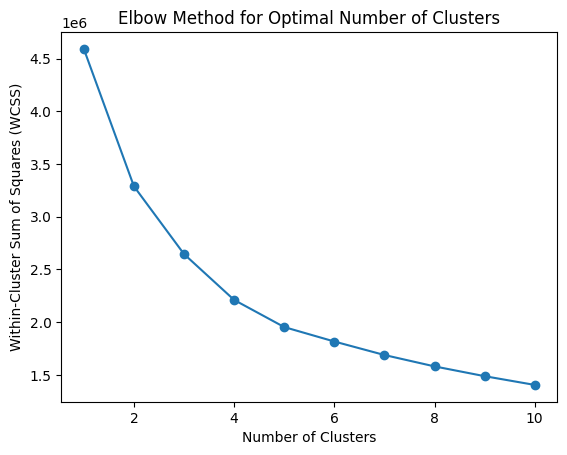

In [ ]:
pca = PCA(n_components=4)
pca_result = pca.fit_transform(inc1)

# Step 3: Plot elbow plot to determine the number of clusters
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(pca_result)
    wcss.append(kmeans.inertia_)

# Plot the elbow plot
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()


In [ ]:
from sklearn.cluster import KMeans

# Step 4: Apply K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(pca_result)

# Step 5: Assign cluster labels to each point in the DataFrame
inc1['Cluster'] = cluster_labels

# Print the DataFrame with cluster labels assigned
#print(inc1.head())

In [ ]:
from sklearn.metrics import silhouette_score

# Assuming cluster_labels contains the cluster labels assigned by K-means clustering
# Assuming pca_result contains the PCA-transformed data

# Calculate silhouette score
silhouette_avg = silhouette_score(pca_result, cluster_labels)

# Print the silhouette score
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.2911632439972894


In [ ]:
# Step 1: Analyze Cluster Characteristics and Calculate Summary Statistics

# Calculate mean and standard deviation for each feature within each cluster
cluster_summary_stats = inc1.groupby('Cluster').agg(['mean'])

# Print the mean and standard deviation for each feature within each cluster
# print(cluster_summary_stats)
cl=pd.DataFrame(cluster_summary_stats)

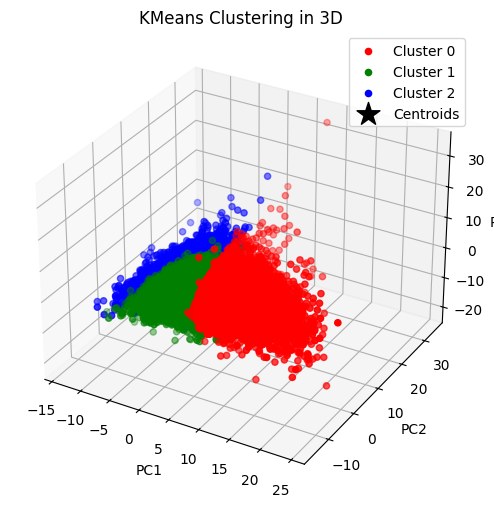

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importing 3D axes

# Assuming you have your data points, cluster labels, and centroids
# data_points = ...
# cluster_labels = ...
# centroids = ...

# Plotting the clusters
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')  # Creating a 3D subplot

# Define colors for each cluster
colors = ['r', 'g', 'b']

for cluster_id in range(len(set(cluster_labels))):
    # Filter data points for the current cluster
    cluster_data = pca_result[cluster_labels == cluster_id]

    # Plot data points for the current cluster
    ax.scatter(cluster_data[:, 0], cluster_data[:, 1], cluster_data[:, 2],
               color=colors[cluster_id], label=f'Cluster {cluster_id}')

# Plot centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2],
           marker='*', s=300, c='black', label='Centroids')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.title('KMeans Clustering in 3D')
plt.legend()
plt.show()


In [ ]:
nmn=cl.transpose()

In [ ]:
# nmn.iloc[110:,:]

In [ ]:
pca_result = pd.DataFrame(pca_result)

In [ ]:
pca_result['Cluster']= cluster_labels

In [ ]:
cluster_centers = kmeans.cluster_centers_

In [ ]:
def inverse_distance_weighting(data_point_scaled, cluster_centers, risk_levels):
    # Calculate inverse distances
    distances = np.linalg.norm(cluster_centers - data_point_scaled, axis=1)
    inverse_distances = 1 / distances

    # Handle infinity values in case a point is exactly on a cluster center
    inverse_distances = np.nan_to_num(inverse_distances, nan=np.inf)

    # Weight risk levels by inverse distances and normalize
    weighted_risk_score = np.dot(inverse_distances, risk_levels) / np.sum(inverse_distances)

    return weighted_risk_score

In [ ]:
# Assuming X, cluster_centers, and risk_levels are defined
# X: Data points
# cluster_centers: Cluster centers obtained from KMeans
# risk_levels: Risk levels associated with each cluster
risk_levels = [0.05,1,0.5]
# Initialize an empty list to store risk scores for all data points
all_risk_scores = []
X = pca_result.drop(columns=['Cluster']).values
# Iterate over each data point in X
for data_point in X:
    # Calculate the risk score for the current data point
    risk_score = inverse_distance_weighting(data_point, cluster_centers, risk_levels)
    # Append the risk score to the list
    all_risk_scores.append(risk_score)

# Convert the list of risk scores to a NumPy array for easier manipulation
all_risk_scores = np.array(all_risk_scores)

# Print or further process the risk scores
# print("Risk scores for all data points:")
# print(all_risk_scores)

In [ ]:
ss_df['Score'] = all_risk_scores

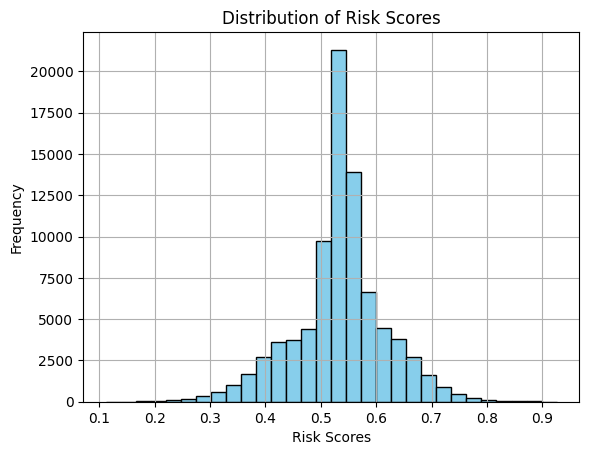

In [ ]:
import matplotlib.pyplot as plt

# Assuming all_risk_scores is defined and contains the risk scores for all data points

# Plot histogram of risk scores
plt.hist(all_risk_scores, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Risk Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Risk Scores')
plt.grid(True)
plt.show()


In [ ]:
df1 = pd.DataFrame(scaler.inverse_transform(df))
df1.columns = df.columns
scaler.fit(df1[col2])
df2 = pd.DataFrame(scaler.inverse_transform(nmn.transpose()))
df2.columns = df1[col2].columns
df2

In [ ]:
df2['ACS_MEDIAN_HOME_VALUE']

0    429564.742266
1    197144.692615
2    273273.242941
Name: ACS_MEDIAN_HOME_VALUE, dtype: float64

In [ ]:
ss_df.to_csv('ss_df.csv')

In [ ]:
## Rationale


**Cluster 0: Stable and Supported**

- **Social Support and Security Rationale:**
  - **Variables:** Higher median home values (ACS_MEDIAN_HOME_VALUE), median rent (ACS_MEDIAN_RENT), and median owner costs (ACS_MDN_OWNER_COST_MORTGAGE, ACS_MDN_OWNER_COST_NO_MORTG); higher percentages of owner-occupied housing units (ACS_PCT_OWNER_HU); lower percentages of vacant housing units (ACS_PCT_VACANT_HU); higher percentages of citizens above 18 (ACS_PCT_CTZ_ABOVE18); higher percentages of households with one or more people 65 years and over (ACS_PCT_HH_ABOVE65); higher percentages of owner-occupied housing units with children (ACS_PCT_OWNER_HU_CHILD).
  - **Rationale:** This cluster represents areas with stable socioeconomic conditions, characterized by higher homeownership rates, lower housing turnover, and stronger familial and community support systems. The presence of elderly individuals and families with children suggests a supportive environment.

- **Healthcare Risk:**
  - **Rationale:** Despite stability and support, potential healthcare risks may include higher healthcare costs due to the aging population and associated healthcare needs. Healthcare access disparities among the elderly population, especially those living alone, may also be a concern.

**Cluster 1: Vulnerable and Marginalized**

- **Social Support and Security Rationale:**
  - **Variables:** Lower median home values, median rent, and median owner costs (ACS_MEDIAN_HOME_VALUE, ACS_MEDIAN_RENT, ACS_MDN_OWNER_COST_MORTGAGE, ACS_MDN_OWNER_COST_NO_MORTG); higher percentages of vacant housing units (ACS_PCT_VACANT_HU); higher percentages of foreign-born individuals (ACS_PCT_FOREIGN_BORN); higher percentages of households with only one occupant (ACS_PCT_HH_1PERS); higher percentages of renter-occupied housing units with children (ACS_PCT_RENTER_HU_CHILD).
  - **Rationale:** This cluster represents economically disadvantaged and transient areas with lower homeownership rates, higher housing turnover, and potentially weaker familial and community support systems, compounded by a higher percentage of foreign-born residents.

- **Healthcare Risk:**
  - **Rationale:** The marginalized and transient nature of this cluster may lead to challenges in accessing healthcare services, resulting in poorer health outcomes. Higher rates of housing instability could contribute to increased stress and mental health issues among residents, exacerbating healthcare needs.

**Cluster 2: Diverse and Transitional**

- **Social Support and Security Rationale:**
  - **Variables:** Moderate values for median home values, median rent, and median owner costs (ACS_MEDIAN_HOME_VALUE, ACS_MEDIAN_RENT, ACS_MDN_OWNER_COST_MORTGAGE, ACS_MDN_OWNER_COST_NO_MORTG); mixed percentages of owner-occupied and renter-occupied housing units with children (ACS_PCT_OWNER_HU_CHILD, ACS_PCT_RENTER_HU_CHILD); mixed percentages of citizens above 18 and foreign-born individuals (ACS_PCT_CTZ_ABOVE18, ACS_PCT_FOREIGN_BORN); presence of households with one or more people 65 years and over, along with those with only one occupant (ACS_PCT_HH_ABOVE65, ACS_PCT_HH_1PERS).
  - **Rationale:** This cluster represents areas with diverse socioeconomic and demographic profiles, reflecting a mix of stable and transitional housing situations, along with a blend of established and immigrant populations.

- **Healthcare Risk:**
  - **Rationale:** The transitional nature of this cluster may pose challenges in healthcare planning and resource allocation due to diverse healthcare needs and socioeconomic backgrounds. Tailored healthcare interventions may be needed to address the varied needs of different demographic groups within this cluster.

# Food Security

In [ ]:
import pandas as pd
import numpy as np
import plotly as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('imputed_chosen280_variables.csv')

In [ ]:
df.drop(columns = ['Unnamed: 0'],inplace = True)

In [ ]:
# Extract numeric columns and normalize them
scaler = StandardScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df)
df

0         1         2         3         4         5         6    \
0     -0.403541  1.277722 -1.154109 -1.114473 -0.240481  0.018059 -0.379630   
1     -0.403541 -1.060705 -1.264271 -0.778113  0.441184 -0.419313  1.661023   
2     -0.403541 -0.017110 -0.104572 -0.140095  0.056260 -0.353427 -0.015013   
3      0.444834 -0.361461 -0.197372 -0.531633 -0.845862  0.602622 -0.381130   
4     -0.403541 -0.656619  0.261838  0.574010 -0.214586  1.109384 -0.568690   
...         ...       ...       ...       ...       ...       ...       ...   
84409  1.682626  1.089734 -0.445836 -0.650058 -0.622606 -0.106704 -0.703734   
84410 -0.014123 -0.530123 -0.980483 -0.256611 -0.777975 -0.659026  0.397619   
84411 -0.403541 -0.054005 -0.772731 -0.239693 -0.381853  0.414777 -0.334616   
84412 -0.403541  0.198988 -0.354833 -0.873113 -0.773076 -1.094294 -1.042842   
84413 -0.403541 -0.774331 -0.121336 -0.810213 -0.803170 -0.333801 -0.654218   

            7         8         9    ...       270       271       272  \
0      0.541708 -0.942251 -0.033752  ...  0.615285 -0.141401  0.559106   
1     -1.556369  0.921541 -0.675091  ... -0.103794  0.892784  0.819151   
2      0.313192 -0.769992  0.118003  ... -0.477505 -0.141401 -0.178976   
3      1.073833 -0.734693  0.212565  ...  1.602110 -0.141401 -0.740262   
4      1.012982 -0.853298  0.708249  ...  0.830267 -0.141401 -0.318010   
...         ...       ...       ...  ...       ...       ...       ...   
84409  1.617611 -1.447734 -1.703064  ... -0.237667 -0.141401 -0.945380   
84410 -0.453924  0.447827 -0.334213  ... -0.100305 -0.141401 -0.893028   
84411  1.185178 -1.022733 -0.389882  ... -0.265139 -0.141401 -0.843250   
84412  0.323549 -1.094037 -0.881753  ... -0.494076 -0.073462 -1.007173   
84413  0.670531 -0.757990 -0.678904  ... -0.795400  2.289311 -0.217597   

            273       274       275       276       277       278       279  
0     -0.758684 -0.792701  0.908318 -0.630869 -1.176672  0.198383 -0.220984  
1     -0.784995  0.427974  0.912508 -0.312182 -1.217139  0.191374 -0.652763  
2     -0.258779 -0.817869  0.577745 -0.630869 -0.158984  0.172500  1.015423  
3     -0.523140 -0.739847  0.695075 -0.630869 -0.028588 -0.812220 -0.292381  
4     -0.098408 -0.926094  0.561449 -0.630869  0.227707  3.568909 -0.371710  
...         ...       ...       ...       ...       ...       ...       ...  
84409 -0.772466 -1.029285  0.853377  1.379311 -0.397294  0.335912  0.592710  
84410 -0.784995 -0.440341  0.465070 -0.459268 -1.021546  0.379723  2.223498  
84411 -0.332700 -1.165195  0.451568 -0.630869 -0.809465  0.379723  1.133284  
84412 -0.524392 -0.976431  0.792384  0.790965 -0.264650 -0.812220  0.993890  
84413 -0.665970 -0.160970  0.860361  0.668394 -0.097533 -0.812220  1.046021  

[84414 rows x 280 columns]

In [ ]:
df.columns = scaler.get_feature_names_out()

In [ ]:
str3 = """ACS_PCT_HH_FOOD_STMP
ACS_PCT_HH_FOOD_STMP_BLW_POV
ACS_PCT_HH_NO_FD_STMP_BLW_POV
ACS_PCT_HH_PUB_ASSIST"""

In [ ]:
col2 = str3.split('\n')

In [ ]:
fs_df = df[col2]

In [ ]:
from sklearn.cluster import KMeans

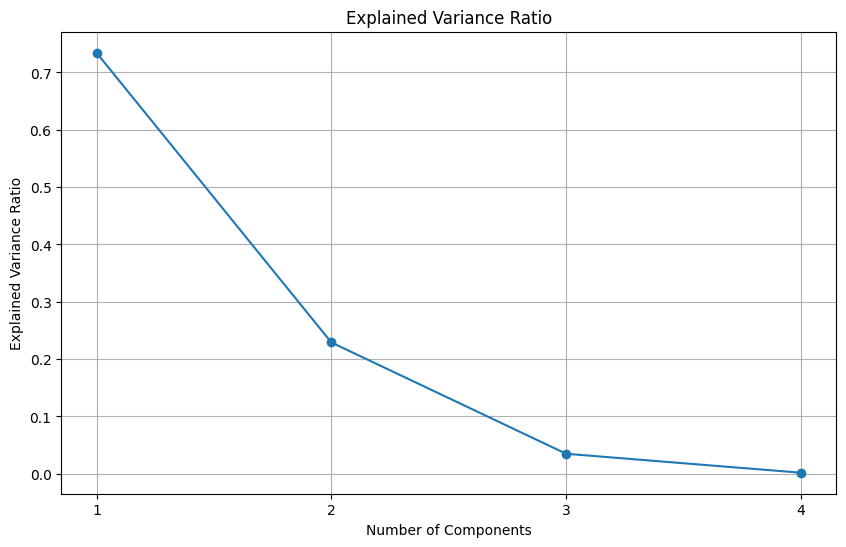

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming inc1 is your dataframe containing the features
inc1=fs_df


# Step 2: Apply PCA
pca = PCA()
pca.fit(inc1)

# Step 3: Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Step 4: Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()

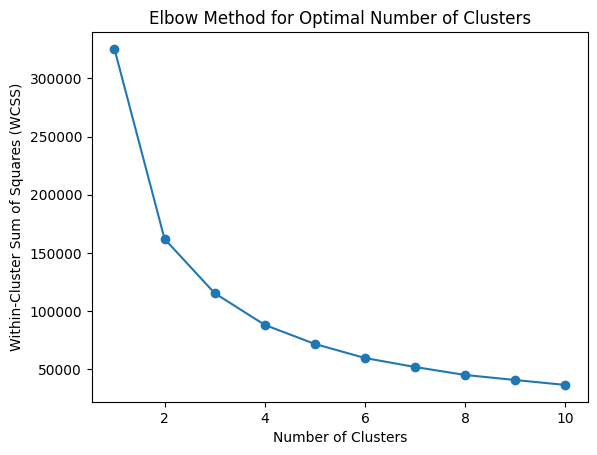

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(inc1)

# Step 3: Plot elbow plot to determine the number of clusters
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(pca_result)
    wcss.append(kmeans.inertia_)

# Plot the elbow plot
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()


In [ ]:
from sklearn.cluster import KMeans

# Step 4: Apply K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(pca_result)

# Step 5: Assign cluster labels to each point in the DataFrame
inc1['Cluster'] = cluster_labels

# Print the DataFrame with cluster labels assigned
#print(inc1.head())

In [ ]:
# Step 1: Analyze Cluster Characteristics and Calculate Summary Statistics

# Calculate mean and standard deviation for each feature within each cluster
cluster_summary_stats = inc1.groupby('Cluster').agg(['mean', 'std'])

# Print the mean and standard deviation for each feature within each cluster
# print(cluster_summary_stats)
cl=pd.DataFrame(cluster_summary_stats)

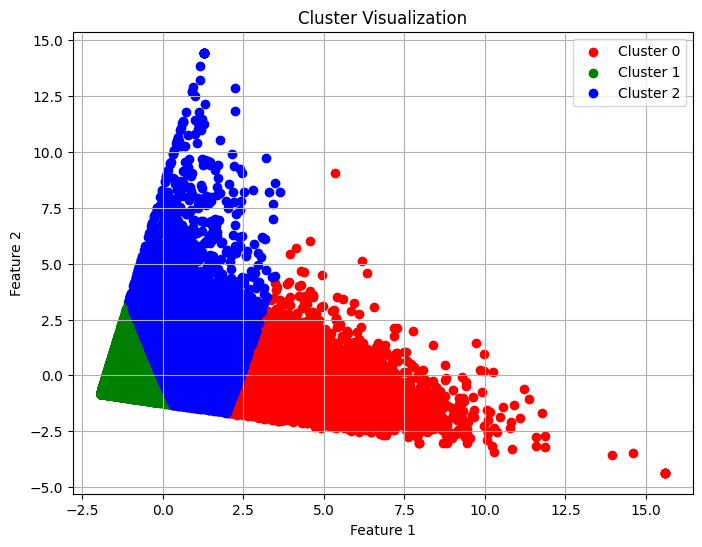

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have your data points and cluster labels
# data_points = ...
# cluster_labels = ...

# Plotting the clusters
plt.figure(figsize=(8, 6))

# Define colors for each cluster
colors = ['r', 'g', 'b']

for cluster_id in range(len(set(cluster_labels))):
    # Filter data points for the current cluster
    cluster_data = pca_result[cluster_labels == cluster_id]

    # Plot data points for the current cluster
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], color=colors[cluster_id], label=f'Cluster {cluster_id}')

# Add labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Cluster Visualization')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [ ]:
nmn=cl.transpose()

In [ ]:
nmn

Cluster                                    0         1         2
ACS_PCT_HH_FOOD_STMP          mean  2.317867 -0.600808  0.448602
                              std   0.851696  0.333278  0.506537
ACS_PCT_HH_FOOD_STMP_BLW_POV  mean  2.327028 -0.546147  0.340477
                              std   1.216117  0.263099  0.547572
ACS_PCT_HH_NO_FD_STMP_BLW_POV mean  0.436714 -0.366045  0.571718
                              std   0.930463  0.554481  1.316145
ACS_PCT_HH_PUB_ASSIST         mean  2.303462 -0.600514  0.452444
                              std   0.846604  0.346127  0.509889

In [ ]:
pca_result = pd.DataFrame(pca_result)

In [ ]:
pca_result['Cluster']= cluster_labels

In [ ]:
cluster_centers = kmeans.cluster_centers_

In [ ]:
def inverse_distance_weighting(data_point_scaled, cluster_centers, risk_levels):
    # Calculate inverse distances
    distances = np.linalg.norm(cluster_centers - data_point_scaled, axis=1)
    inverse_distances = 1 / distances

    # Handle infinity values in case a point is exactly on a cluster center
    inverse_distances = np.nan_to_num(inverse_distances, nan=np.inf)

    # Weight risk levels by inverse distances and normalize
    weighted_risk_score = np.dot(inverse_distances, risk_levels) / np.sum(inverse_distances)

    return weighted_risk_score

In [ ]:
# Assuming X, cluster_centers, and risk_levels are defined
# X: Data points
# cluster_centers: Cluster centers obtained from KMeans
# risk_levels: Risk levels associated with each cluster
risk_levels = [1,0.05,0.5]
# Initialize an empty list to store risk scores for all data points
all_risk_scores = []
X = pca_result.drop(columns=['Cluster']).values
# Iterate over each data point in X
for data_point in X:
    # Calculate the risk score for the current data point
    risk_score = inverse_distance_weighting(data_point, cluster_centers, risk_levels)
    # Append the risk score to the list
    all_risk_scores.append(risk_score)

# Convert the list of risk scores to a NumPy array for easier manipulation
all_risk_scores = np.array(all_risk_scores)

# Print or further process the risk scores
# print("Risk scores for all data points:")
# print(all_risk_scores)

In [ ]:
fs_df['Score'] = all_risk_scores

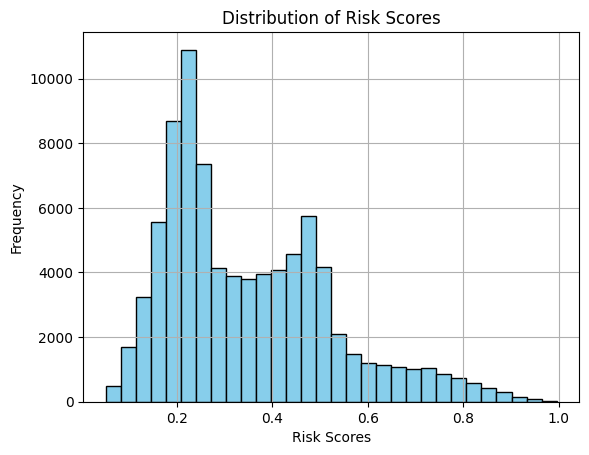

In [ ]:
import matplotlib.pyplot as plt

# Assuming all_risk_scores is defined and contains the risk scores for all data points

# Plot histogram of risk scores
plt.hist(all_risk_scores, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Risk Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Risk Scores')
plt.grid(True)
plt.show()


In [ ]:
all_risk_scores.mean()

0.3494908164908833

**Cluster 0:**
- **High Food Stamp Recipients:**
  - **ACS_PCT_HH_FOOD_STMP:** Mean percentage of households receiving food stamps/SNAP is significantly higher than average.
  - **ACS_PCT_HH_FOOD_STMP_BLW_POV:** Mean percentage of households receiving food stamps/SNAP with income below the poverty level is significantly higher than average.
  - **ACS_PCT_HH_NO_FD_STMP_BLW_POV:** Mean percentage of households not receiving food stamps/SNAP with income below the poverty level is relatively low.
  - **ACS_PCT_HH_PUB_ASSIST:** Mean percentage of households with public assistance income or food stamps/SNAP is significantly higher than average.

*Rationale:* Cluster 0 represents areas with high food stamp usage, especially among households below the poverty level. The high percentage of households with public assistance income or food stamps/SNAP indicates economic vulnerability. This cluster is at high risk for food insecurity, which can lead to various health issues due to inadequate nutrition.

**Cluster 1:**
- **Low Food Stamp Recipients:**
  - **ACS_PCT_HH_FOOD_STMP:** Mean percentage of households receiving food stamps/SNAP is significantly lower than average.
  - **ACS_PCT_HH_FOOD_STMP_BLW_POV:** Mean percentage of households receiving food stamps/SNAP with income below the poverty level is lower than average.
  - **ACS_PCT_HH_NO_FD_STMP_BLW_POV:** Mean percentage of households not receiving food stamps/SNAP with income below the poverty level is higher than average.
  - **ACS_PCT_HH_PUB_ASSIST:** Mean percentage of households with public assistance income or food stamps/SNAP is significantly lower than average.

*Rationale:* Cluster 1 represents areas with low food stamp usage, especially among households below the poverty level. The higher percentage of households not receiving food stamps/SNAP with income below the poverty level suggests better economic stability. This cluster is at lower risk for food insecurity compared to Cluster 0.

**Cluster 2:**
- **Moderate Food Stamp Recipients:**
  - **ACS_PCT_HH_FOOD_STMP:** Mean percentage of households receiving food stamps/SNAP is close to the average.
  - **ACS_PCT_HH_FOOD_STMP_BLW_POV:** Mean percentage of households receiving food stamps/SNAP with income below the poverty level is close to the average.
  - **ACS_PCT_HH_NO_FD_STMP_BLW_POV:** Mean percentage of households not receiving food stamps/SNAP with income below the poverty level is also close to the average.
  - **ACS_PCT_HH_PUB_ASSIST:** Mean percentage of households with public assistance income or food stamps/SNAP is close to the average.

*Rationale:* Cluster 2 represents areas with moderate food stamp usage, with percentages close to the average across all metrics. These areas may have some level of food insecurity, but it is not as pronounced as in Cluster 0. The risk for healthcare due to food insecurity in this cluster is moderate.

In [ ]:
fs_df.to_csv('fs_df.csv')

# ChildCare Access

In [ ]:
import pandas as pd
import numpy as np
import plotly as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('imputed_chosen280_variables.csv')

In [ ]:
df.drop(columns = ['Unnamed: 0'],inplace = True)

In [ ]:
# Extract numeric columns and normalize them
scaler = StandardScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df)
df

0         1         2         3         4         5         6    \
0     -0.403541  1.277722 -1.154109 -1.114473 -0.240481  0.018059 -0.379630   
1     -0.403541 -1.060705 -1.264271 -0.778113  0.441184 -0.419313  1.661023   
2     -0.403541 -0.017110 -0.104572 -0.140095  0.056260 -0.353427 -0.015013   
3      0.444834 -0.361461 -0.197372 -0.531633 -0.845862  0.602622 -0.381130   
4     -0.403541 -0.656619  0.261838  0.574010 -0.214586  1.109384 -0.568690   
...         ...       ...       ...       ...       ...       ...       ...   
84409  1.682626  1.089734 -0.445836 -0.650058 -0.622606 -0.106704 -0.703734   
84410 -0.014123 -0.530123 -0.980483 -0.256611 -0.777975 -0.659026  0.397619   
84411 -0.403541 -0.054005 -0.772731 -0.239693 -0.381853  0.414777 -0.334616   
84412 -0.403541  0.198988 -0.354833 -0.873113 -0.773076 -1.094294 -1.042842   
84413 -0.403541 -0.774331 -0.121336 -0.810213 -0.803170 -0.333801 -0.654218   

            7         8         9    ...       270       271       272  \
0      0.541708 -0.942251 -0.033752  ...  0.615285 -0.141401  0.559106   
1     -1.556369  0.921541 -0.675091  ... -0.103794  0.892784  0.819151   
2      0.313192 -0.769992  0.118003  ... -0.477505 -0.141401 -0.178976   
3      1.073833 -0.734693  0.212565  ...  1.602110 -0.141401 -0.740262   
4      1.012982 -0.853298  0.708249  ...  0.830267 -0.141401 -0.318010   
...         ...       ...       ...  ...       ...       ...       ...   
84409  1.617611 -1.447734 -1.703064  ... -0.237667 -0.141401 -0.945380   
84410 -0.453924  0.447827 -0.334213  ... -0.100305 -0.141401 -0.893028   
84411  1.185178 -1.022733 -0.389882  ... -0.265139 -0.141401 -0.843250   
84412  0.323549 -1.094037 -0.881753  ... -0.494076 -0.073462 -1.007173   
84413  0.670531 -0.757990 -0.678904  ... -0.795400  2.289311 -0.217597   

            273       274       275       276       277       278       279  
0     -0.758684 -0.792701  0.908318 -0.630869 -1.176672  0.198383 -0.220984  
1     -0.784995  0.427974  0.912508 -0.312182 -1.217139  0.191374 -0.652763  
2     -0.258779 -0.817869  0.577745 -0.630869 -0.158984  0.172500  1.015423  
3     -0.523140 -0.739847  0.695075 -0.630869 -0.028588 -0.812220 -0.292381  
4     -0.098408 -0.926094  0.561449 -0.630869  0.227707  3.568909 -0.371710  
...         ...       ...       ...       ...       ...       ...       ...  
84409 -0.772466 -1.029285  0.853377  1.379311 -0.397294  0.335912  0.592710  
84410 -0.784995 -0.440341  0.465070 -0.459268 -1.021546  0.379723  2.223498  
84411 -0.332700 -1.165195  0.451568 -0.630869 -0.809465  0.379723  1.133284  
84412 -0.524392 -0.976431  0.792384  0.790965 -0.264650 -0.812220  0.993890  
84413 -0.665970 -0.160970  0.860361  0.668394 -0.097533 -0.812220  1.046021  

[84414 rows x 280 columns]

In [ ]:
df.columns = scaler.get_feature_names_out()

In [ ]:
str3 = '''ACS_MDN_GRNDPRNT_INC
ACS_MDN_GRNDPRNT_NO_PRNT_INC
ACS_PCT_CHILDREN_GRANDPARENT
ACS_PCT_CHILD_1FAM
ACS_PCT_GRANDP_NO_RESPS
ACS_PCT_GRANDP_RESPS_NO_P
ACS_PCT_GRANDP_RESPS_P
ACS_PCT_INC50_BELOW17
ACS_TOT_GRANDCHILDREN_GP
ACS_TOT_OWN_CHILD_BELOW17'''

In [ ]:
list1 = ['ACS_MEDIAN_HH_INC_NHPI',
'ACS_MDN_GRNDPRNT_NO_PRNT_INC',
'ACS_MEDIAN_HH_INC_AIAN',
'ACS_MDN_GRNDPRNT_INC',
'ACS_PCT_POV_NHPI',
'ACS_PCT_NHPI_FEMALE',
'ACS_PCT_NHPI_MALE',
'ACS_MEDIAN_HH_INC_OTHER',
'ACS_MEDIAN_HH_INC_ASIAN',
'ACS_MEDIAN_HH_INC_MULTI',
'ACS_MEDIAN_HH_INC_BLACK',
'ACS_PCT_POV_AIAN'
]

In [ ]:
col2 = str3.split('\n')

In [ ]:
col2 = [x for x in col2 if x not in list1]

In [ ]:
ca_df = df[col2]
ca_df.shape

(84414, 8)

In [ ]:
from sklearn.cluster import KMeans

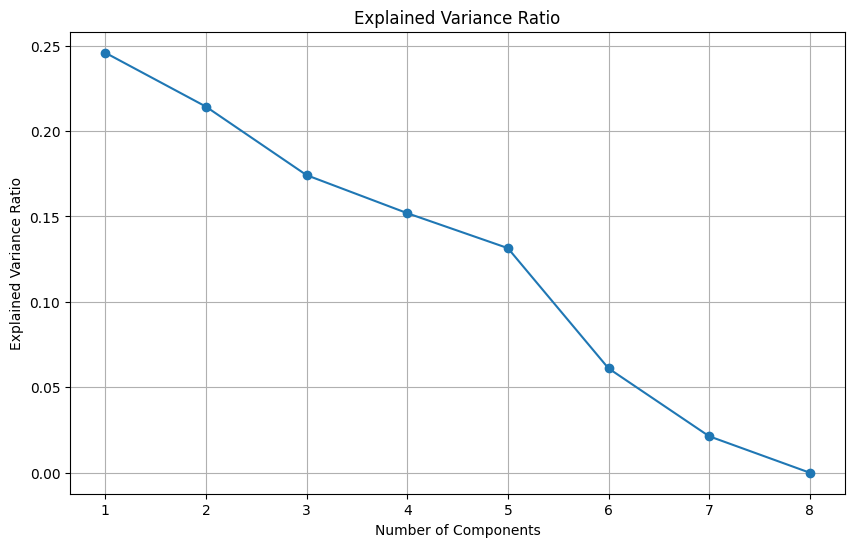

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming inc1 is your dataframe containing the features
inc1=ca_df


# Step 2: Apply PCA
pca = PCA()
pca.fit(inc1)

# Step 3: Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Step 4: Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()

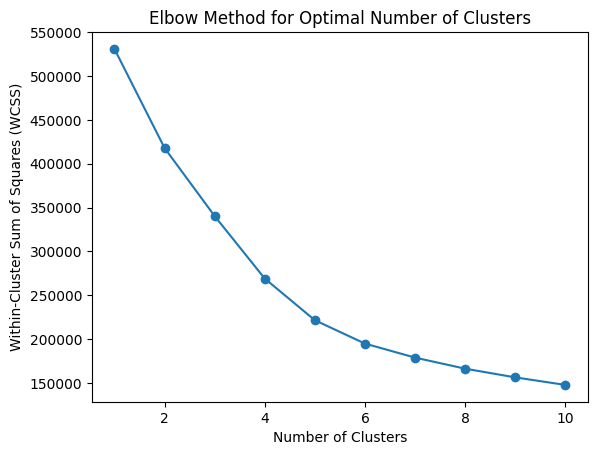

In [ ]:
pca = PCA(n_components=4)
pca_result = pca.fit_transform(inc1)

# Step 3: Plot elbow plot to determine the number of clusters
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(pca_result)
    wcss.append(kmeans.inertia_)

# Plot the elbow plot
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()


In [ ]:

from sklearn.cluster import KMeans

# Step 4: Apply K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(pca_result)

# Step 5: Assign cluster labels to each point in the DataFrame
inc1['Cluster'] = cluster_labels

# Print the DataFrame with cluster labels assigned
#print(inc1.head())

In [ ]:
# Step 1: Analyze Cluster Characteristics and Calculate Summary Statistics

# Calculate mean and standard deviation for each feature within each cluster
cluster_summary_stats = inc1.groupby('Cluster').agg(['mean', 'std'])

# Print the mean and standard deviation for each feature within each cluster
# print(cluster_summary_stats)
cl=pd.DataFrame(cluster_summary_stats)

In [ ]:
nmn=cl.transpose()

In [ ]:
nmn

Cluster                                   0         1         2         3
ACS_PCT_CHILDREN_GRANDPARENT mean -0.034043 -0.010444  1.559063 -0.420471
                             std   0.661711  0.750462  1.274851  0.516649
ACS_PCT_CHILD_1FAM           mean  0.007219  0.066377  0.674865 -0.206405
                             std   0.945282  0.989999  1.109310  0.897909
ACS_PCT_GRANDP_NO_RESPS      mean -1.150401 -1.160064  0.235157  0.603456
                             std   0.487954  0.503792  0.812232  0.617102
ACS_PCT_GRANDP_RESPS_NO_P    mean -0.443289  2.189627 -0.197077 -0.316168
                             std   0.451594  0.791431  0.674680  0.437158
ACS_PCT_GRANDP_RESPS_P       mean  1.702811 -0.608851 -0.094284 -0.409182
                             std   0.648584  0.484261  0.787532  0.488794
ACS_PCT_INC50_BELOW17        mean -0.003647  0.114338  0.608041 -0.195513
                             std   0.930219  1.052909  1.405490  0.777072
ACS_TOT_GRANDCHILDREN_GP     mean -0.051426 -0.131063  1.605523 -0.398724
                             std   0.582032  0.561204  1.435310  0.459319
ACS_TOT_OWN_CHILD_BELOW17    mean  0.125293 -0.092053  0.032145 -0.029731
                             std   0.996683  0.865563  0.999405  1.026620

In [ ]:
pca_result = pd.DataFrame(pca_result)

In [ ]:
pca_result['Cluster']= cluster_labels

In [ ]:
cluster_centers = kmeans.cluster_centers_

In [ ]:
def inverse_distance_weighting(data_point_scaled, cluster_centers, risk_levels):
    # Calculate inverse distances
    distances = np.linalg.norm(cluster_centers - data_point_scaled, axis=1)
    inverse_distances = 1 / distances

    # Handle infinity values in case a point is exactly on a cluster center
    inverse_distances = np.nan_to_num(inverse_distances, nan=np.inf)

    # Weight risk levels by inverse distances and normalize
    weighted_risk_score = np.dot(inverse_distances, risk_levels) / np.sum(inverse_distances)

    return weighted_risk_score

In [ ]:
# Assuming X, cluster_centers, and risk_levels are defined
# X: Data points
# cluster_centers: Cluster centers obtained from KMeans
# risk_levels: Risk levels associated with each cluster
risk_levels = [1,0.25,1,0.5]
# Initialize an empty list to store risk scores for all data points
all_risk_scores = []
X = pca_result.drop(columns=['Cluster']).values
# Iterate over each data point in X
for data_point in X:
    # Calculate the risk score for the current data point
    risk_score = inverse_distance_weighting(data_point, cluster_centers, risk_levels)
    # Append the risk score to the list
    all_risk_scores.append(risk_score)

# Convert the list of risk scores to a NumPy array for easier manipulation
all_risk_scores = np.array(all_risk_scores)

# Print or further process the risk scores
# print("Risk scores for all data points:")
# print(all_risk_scores)

In [ ]:
ca_df['Score'] = all_risk_scores

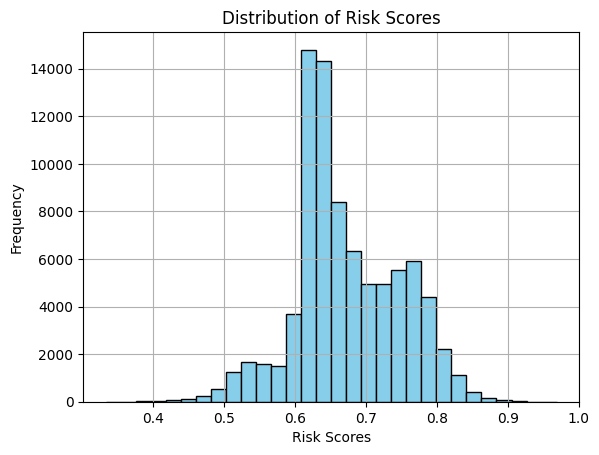

In [ ]:
import matplotlib.pyplot as plt

# Assuming all_risk_scores is defined and contains the risk scores for all data points

# Plot histogram of risk scores
plt.hist(all_risk_scores, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Risk Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Risk Scores')
plt.grid(True)
plt.show()


In [ ]:
all_risk_scores.mean()

0.6726546966210376

**Cluster 0: Low Childcare Access, High Risk**
- ACS_PCT_CHILDREN_GRANDPARENT: Below average percentage of children living with a grandparent householder.
- ACS_PCT_CHILD_1FAM: Below average percentage of single-parent families.
- ACS_PCT_GRANDP_NO_RESPS: Above average percentage of children living with grandparent householder whose grandparent is not responsible for them.
- ACS_PCT_GRANDP_RESPS_NO_P: Below average percentage of children living with grandparent householder whose grandparent is responsible for them but parent not present.
- ACS_PCT_GRANDP_RESPS_P: Above average percentage of children living with grandparent householder whose grandparent is responsible for them and parent present.
- ACS_PCT_INC50_BELOW17: Below average percentage of children with income to poverty ratio under 0.50.
- ACS_TOT_GRANDCHILDREN_GP: Below average total grandchildren under 18 living with grandparent householder.
- ACS_TOT_OWN_CHILD_BELOW17: Above average total own children (ages 17 and below).

Rationale: This cluster indicates areas where there is relatively low childcare access and a mix of risk factors related to healthcare, such as a significant proportion of children living with grandparents who may not be directly responsible for them, as well as a high proportion of own children below the poverty line.

**Cluster 1: Moderate Childcare Access, Low Risk**
- ACS_PCT_CHILDREN_GRANDPARENT: Below average percentage of children living with a grandparent householder.
- ACS_PCT_CHILD_1FAM: Above average percentage of single-parent families.
- ACS_PCT_GRANDP_NO_RESPS: Below average percentage of children living with grandparent householder whose grandparent is not responsible for them.
- ACS_PCT_GRANDP_RESPS_NO_P: Above average percentage of children living with grandparent householder whose grandparent is responsible for them but parent not present.
- ACS_PCT_GRANDP_RESPS_P: Below average percentage of children living with grandparent householder whose grandparent is responsible for them and parent present.
- ACS_PCT_INC50_BELOW17: Above average percentage of children with income to poverty ratio under 0.50.
- ACS_TOT_GRANDCHILDREN_GP: Below average total grandchildren under 18 living with grandparent householder.
- ACS_TOT_OWN_CHILD_BELOW17: Below average total own children (ages 17 and below).

Rationale: This cluster indicates areas with moderate childcare access and lower risk factors related to healthcare compared to Cluster 0. There is a higher proportion of single-parent families and children below the poverty line, but a lower proportion of children living with grandparents.

**Cluster 2: High Childcare Access, High Risk**
- ACS_PCT_CHILDREN_GRANDPARENT: Above average percentage of children living with a grandparent householder.
- ACS_PCT_CHILD_1FAM: High percentage of single-parent families.
- ACS_PCT_GRANDP_NO_RESPS: Below average percentage of children living with grandparent householder whose grandparent is not responsible for them.
- ACS_PCT_GRANDP_RESPS_NO_P: Below average percentage of children living with grandparent householder whose grandparent is responsible for them but parent not present.
- ACS_PCT_GRANDP_RESPS_P: Below average percentage of children living with grandparent householder whose grandparent is responsible for them and parent present.
- ACS_PCT_INC50_BELOW17: High percentage of children with income to poverty ratio under 0.50.
- ACS_TOT_GRANDCHILDREN_GP: Above average total grandchildren under 18 living with grandparent householder.
- ACS_TOT_OWN_CHILD_BELOW17: Above average total own children (ages 17 and below).

Rationale: This cluster indicates areas with high childcare access but also high risk factors related to healthcare. There is a significant proportion of children living with grandparents, a high proportion of single-parent families, and a high proportion of children below the poverty line.

**Cluster 3: Moderate Childcare Access, Moderate Risk**
- ACS_PCT_CHILDREN_GRANDPARENT: Below average percentage of children living with a grandparent householder.
- ACS_PCT_CHILD_1FAM: Below average percentage of single-parent families.
- ACS_PCT_GRANDP_NO_RESPS: Above average percentage of children living with grandparent householder whose grandparent is not responsible for them.
- ACS_PCT_GRANDP_RESPS_NO_P: Below average percentage of children living with grandparent householder whose grandparent is responsible for them but parent not present.
- ACS_PCT_GRANDP_RESPS_P: Below average percentage of children living with grandparent householder whose grandparent is responsible for them and parent present.
- ACS_PCT_INC50_BELOW17: Below average percentage of children with income to poverty ratio under 0.50.
- ACS_TOT_GRANDCHILDREN_GP: Below average total grandchildren under 18 living with grandparent householder.
- ACS_TOT_OWN_CHILD_BELOW17: Below average total own children (ages 17 and below).

Rationale: This cluster indicates areas with moderate childcare access and moderate risk factors related to healthcare. There is a lower proportion of children living with grandparents and single-parent families compared to Cluster 2, and lower proportions of children below the poverty line compared to Clusters 0 and 2.

In [ ]:
ca_df.to_csv('ca_df.csv')

# Education

In [ ]:
import pandas as pd
import numpy as np
import plotly as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('imputed_chosen280_variables.csv')

In [ ]:
df.drop(columns = ['Unnamed: 0'],inplace = True)

In [ ]:
# Extract numeric columns and normalize them
scaler = StandardScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df)
df

0         1         2         3         4         5         6    \
0     -0.403541  1.277722 -1.154109 -1.114473 -0.240481  0.018059 -0.379630   
1     -0.403541 -1.060705 -1.264271 -0.778113  0.441184 -0.419313  1.661023   
2     -0.403541 -0.017110 -0.104572 -0.140095  0.056260 -0.353427 -0.015013   
3      0.444834 -0.361461 -0.197372 -0.531633 -0.845862  0.602622 -0.381130   
4     -0.403541 -0.656619  0.261838  0.574010 -0.214586  1.109384 -0.568690   
...         ...       ...       ...       ...       ...       ...       ...   
84409  1.682626  1.089734 -0.445836 -0.650058 -0.622606 -0.106704 -0.703734   
84410 -0.014123 -0.530123 -0.980483 -0.256611 -0.777975 -0.659026  0.397619   
84411 -0.403541 -0.054005 -0.772731 -0.239693 -0.381853  0.414777 -0.334616   
84412 -0.403541  0.198988 -0.354833 -0.873113 -0.773076 -1.094294 -1.042842   
84413 -0.403541 -0.774331 -0.121336 -0.810213 -0.803170 -0.333801 -0.654218   

            7         8         9    ...       270       271       272  \
0      0.541708 -0.942251 -0.033752  ...  0.615285 -0.141401  0.559106   
1     -1.556369  0.921541 -0.675091  ... -0.103794  0.892784  0.819151   
2      0.313192 -0.769992  0.118003  ... -0.477505 -0.141401 -0.178976   
3      1.073833 -0.734693  0.212565  ...  1.602110 -0.141401 -0.740262   
4      1.012982 -0.853298  0.708249  ...  0.830267 -0.141401 -0.318010   
...         ...       ...       ...  ...       ...       ...       ...   
84409  1.617611 -1.447734 -1.703064  ... -0.237667 -0.141401 -0.945380   
84410 -0.453924  0.447827 -0.334213  ... -0.100305 -0.141401 -0.893028   
84411  1.185178 -1.022733 -0.389882  ... -0.265139 -0.141401 -0.843250   
84412  0.323549 -1.094037 -0.881753  ... -0.494076 -0.073462 -1.007173   
84413  0.670531 -0.757990 -0.678904  ... -0.795400  2.289311 -0.217597   

            273       274       275       276       277       278       279  
0     -0.758684 -0.792701  0.908318 -0.630869 -1.176672  0.198383 -0.220984  
1     -0.784995  0.427974  0.912508 -0.312182 -1.217139  0.191374 -0.652763  
2     -0.258779 -0.817869  0.577745 -0.630869 -0.158984  0.172500  1.015423  
3     -0.523140 -0.739847  0.695075 -0.630869 -0.028588 -0.812220 -0.292381  
4     -0.098408 -0.926094  0.561449 -0.630869  0.227707  3.568909 -0.371710  
...         ...       ...       ...       ...       ...       ...       ...  
84409 -0.772466 -1.029285  0.853377  1.379311 -0.397294  0.335912  0.592710  
84410 -0.784995 -0.440341  0.465070 -0.459268 -1.021546  0.379723  2.223498  
84411 -0.332700 -1.165195  0.451568 -0.630869 -0.809465  0.379723  1.133284  
84412 -0.524392 -0.976431  0.792384  0.790965 -0.264650 -0.812220  0.993890  
84413 -0.665970 -0.160970  0.860361  0.668394 -0.097533 -0.812220  1.046021  

[84414 rows x 280 columns]

In [ ]:
df.columns = scaler.get_feature_names_out()

In [ ]:
str3 = """ACS_PCT_BACHELOR_DGR
ACS_PCT_COLLEGE_ASSOCIATE_DGR
ACS_PCT_GRADUATE_DGR
ACS_PCT_HS_GRADUATE
ACS_PCT_LT_HS
ACS_PCT_POSTHS_ED
ACS_PCT_VET_BACHELOR
ACS_PCT_VET_COLLEGE
ACS_PCT_VET_HS
ACS_PCT_EDUC
ACS_PCT_GRP_QRT
ACS_PCT_NO_WORK_NO_SCHL_16_19"""

In [ ]:
list1 = ['ACS_MEDIAN_HH_INC_NHPI',
'ACS_MDN_GRNDPRNT_NO_PRNT_INC',
'ACS_MEDIAN_HH_INC_AIAN',
'ACS_MDN_GRNDPRNT_INC',
'ACS_PCT_POV_NHPI',
'ACS_PCT_NHPI_FEMALE',
'ACS_PCT_NHPI_MALE',
'ACS_MEDIAN_HH_INC_OTHER',
'ACS_MEDIAN_HH_INC_ASIAN',
'ACS_MEDIAN_HH_INC_MULTI',
'ACS_MEDIAN_HH_INC_BLACK',
'ACS_PCT_POV_AIAN'
]

In [ ]:
col2 = str3.split('\n')

In [ ]:
col2 = [x for x in col2 if x not in list1]

In [ ]:
edu_df = df[col2]

In [ ]:
edu_df.shape

(84414, 12)

In [ ]:
from sklearn.cluster import KMeans

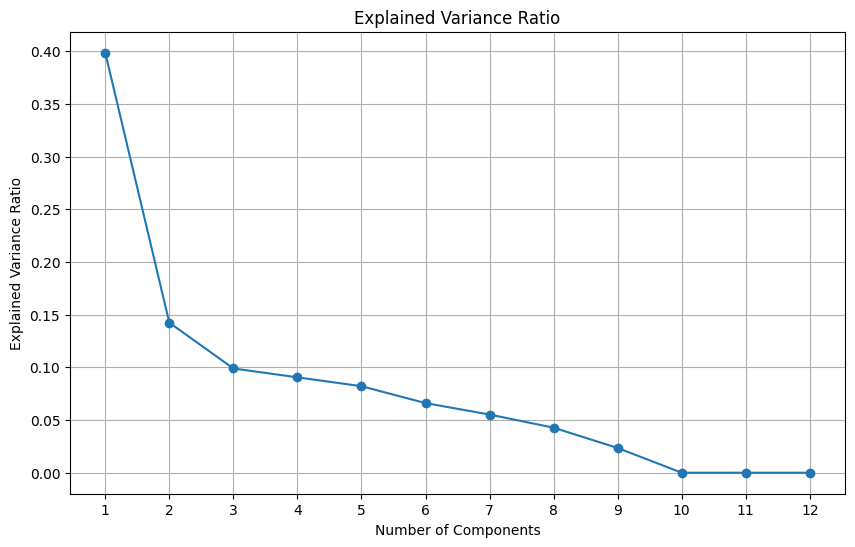

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming inc1 is your dataframe containing the features
inc1=edu_df


# Step 2: Apply PCA
pca = PCA()
pca.fit(inc1)

# Step 3: Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Step 4: Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()


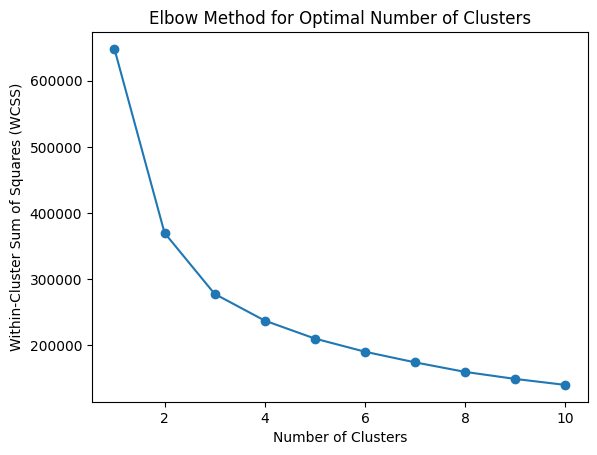

In [ ]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(inc1)

# Step 3: Plot elbow plot to determine the number of clusters
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(pca_result)
    wcss.append(kmeans.inertia_)

# Plot the elbow plot
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# Step 4: Apply K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(pca_result)

# Step 5: Assign cluster labels to each point in the DataFrame
inc1['Cluster'] = cluster_labels

# Print the DataFrame with cluster labels assigned
# print(inc1.head())

Silhouette Score: 0.29181535988067464


In [ ]:
# Step 1: Analyze Cluster Characteristics and Calculate Summary Statistics

# Calculate mean and standard deviation for each feature within each cluster
cluster_summary_stats = inc1.groupby('Cluster').agg(['mean'])

# Print the mean and standard deviation for each feature within each cluster
# print(cluster_summary_stats)
cl=pd.DataFrame(cluster_summary_stats)

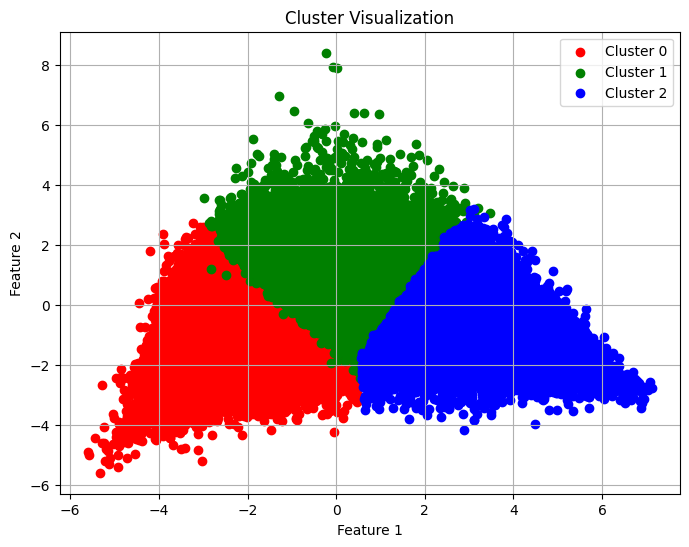

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have your data points and cluster labels
# data_points = ...
# cluster_labels = ...

# Plotting the clusters
plt.figure(figsize=(8, 6))

# Define colors for each cluster
colors = ['r', 'g', 'b']

for cluster_id in range(len(set(cluster_labels))):
    # Filter data points for the current cluster
    cluster_data = pca_result[cluster_labels == cluster_id]

    # Plot data points for the current cluster
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], color=colors[cluster_id], label=f'Cluster {cluster_id}')

# Add labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Cluster Visualization')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [ ]:
nmn=cl.transpose()

In [ ]:
pca_result = pd.DataFrame(pca_result)

In [ ]:
pca_result['Cluster']= cluster_labels

In [ ]:
cluster_centers = kmeans.cluster_centers_

In [ ]:
def inverse_distance_weighting(data_point_scaled, cluster_centers, risk_levels):
    # Calculate inverse distances
    distances = np.linalg.norm(cluster_centers - data_point_scaled, axis=1)
    inverse_distances = 1 / distances

    # Handle infinity values in case a point is exactly on a cluster center
    inverse_distances = np.nan_to_num(inverse_distances, nan=np.inf)

    # Weight risk levels by inverse distances and normalize
    weighted_risk_score = np.dot(inverse_distances, risk_levels) / np.sum(inverse_distances)

    return weighted_risk_score

In [ ]:
# Assuming X, cluster_centers, and risk_levels are defined
# X: Data points
# cluster_centers: Cluster centers obtained from KMeans
# risk_levels: Risk levels associated with each cluster
risk_levels = [1,0.5,0.05]
# Initialize an empty list to store risk scores for all data points
all_risk_scores = []
X = pca_result.drop(columns=['Cluster']).values
# Iterate over each data point in X
for data_point in X:
    # Calculate the risk score for the current data point
    risk_score = inverse_distance_weighting(data_point, cluster_centers, risk_levels)
    # Append the risk score to the list
    all_risk_scores.append(risk_score)

# Convert the list of risk scores to a NumPy array for easier manipulation
all_risk_scores = np.array(all_risk_scores)

# Print or further process the risk scores
# print("Risk scores for all data points:")
# print(all_risk_scores)

In [ ]:
edu_df['Score'] = all_risk_scores

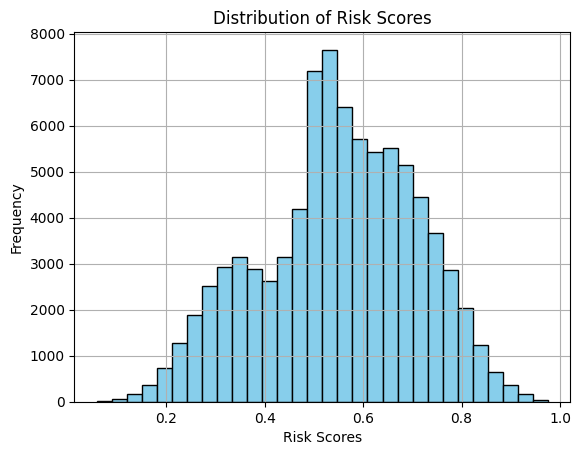

In [ ]:
import matplotlib.pyplot as plt

# Assuming all_risk_scores is defined and contains the risk scores for all data points

# Plot histogram of risk scores
plt.hist(all_risk_scores, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Risk Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Risk Scores')
plt.grid(True)
plt.show()

In [ ]:
df1 = pd.DataFrame(scaler.inverse_transform(df))

In [ ]:
df1.columns = df.columns

In [ ]:
scaler.fit(df1[col2])

StandardScaler()

In [ ]:
df2 = pd.DataFrame(scaler.inverse_transform(nmn.transpose()))

In [ ]:
df2.columns = df1[col2].columns

In [ ]:
df2

ACS_PCT_BACHELOR_DGR  ACS_PCT_COLLEGE_ASSOCIATE_DGR  ACS_PCT_GRADUATE_DGR  \
0             10.456420                      27.100190              5.035027   
1             19.293560                      34.542586             10.398473   
2             33.720416                      21.877186             26.800775   

   ACS_PCT_HS_GRADUATE  ACS_PCT_LT_HS  ACS_PCT_POSTHS_ED  \
0            37.167020      20.241309          42.591671   
1            26.637132       9.128270          64.234587   
2            13.253934       4.347726          82.398408   

   ACS_PCT_VET_BACHELOR  ACS_PCT_VET_COLLEGE  ACS_PCT_VET_HS  ACS_PCT_EDUC  \
0             15.179553            32.080922       52.739593     21.287171   
1             25.183385            46.190548       28.626090     24.093656   
2             56.641535            25.399961       17.958566     25.425707   

   ACS_PCT_GRP_QRT  ACS_PCT_NO_WORK_NO_SCHL_16_19  
0         3.118103                       2.848600  
1         2.297079                       1.930203  
2         2.375856                       0.854788

**Cluster 0 - Low Education, High Risk:**
- ACS_PCT_LT_HS: This cluster has the highest mean percentage of people with less than a high school education, indicating a lower level of educational attainment.
- ACS_PCT_NO_WORK_NO_SCHL_16_19: It also has a relatively higher percentage of unemployed individuals not in school, which may indicate socioeconomic challenges.
- ACS_PCT_HS_GRADUATE: While there's a significant portion with only a high school diploma, it's lower compared to the other clusters.
- ACS_PCT_GRP_QRT: There's a slightly higher percentage of people in institutionalized group quarters, which could reflect additional challenges.
- Risk Level Rationale: This cluster represents individuals with lower educational attainment and potentially higher socioeconomic challenges, which may result in poorer health outcomes due to limited access to resources and healthcare services.

**Cluster 1 - Medium Education, Medium Risk:**
- ACS_PCT_COLLEGE_ASSOCIATE_DGR: This cluster has a relatively higher percentage of individuals with some college education or associate's degree.
- ACS_PCT_VET_COLLEGE: Among civilian veterans, there's a substantial percentage with some college education or associate's degree.
- ACS_PCT_POSTHS_ED: There's a high percentage of people with postsecondary education.
- ACS_PCT_EDUC: This cluster has a moderate percentage of employed individuals working in educational services and healthcare, indicating some involvement in healthcare-related fields.
- Risk Level Rationale: This cluster represents individuals with moderate educational attainment, suggesting relatively average access to resources and healthcare services compared to the other clusters.

**Cluster 2 - High Education, Low Risk:**
- ACS_PCT_BACHELOR_DGR: This cluster has the highest mean percentage of people with a bachelor's degree or higher, indicating higher educational attainment.
- ACS_PCT_GRADUATE_DGR: There's also a significant percentage of individuals with a master's or professional school degree or doctorate.
- ACS_PCT_VET_BACHELOR: Among civilian veterans, there's a considerable percentage with a bachelor's degree or higher.
- Risk Level Rationale: This cluster represents individuals with higher educational attainment, which correlates with better health outcomes and access to healthcare resources. Therefore, the risk for healthcare is lower in this cluster compared to others.

These labels are based on the educational composition of each cluster and the associated risk levels for healthcare. Individuals with higher educational attainment typically have better health outcomes and access to healthcare services, while those with lower educational attainment may face more significant challenges in maintaining good health.

In [ ]:
edu_df.to_csv('edu_df.csv')

In [ ]:
len(all_risk_scores)

84414